### <font color = Grey>--------------------------------------------------------</font><font color = Navy Blue> Telecom Churn Case Study </font> <font color = Grey>------------------------------------------------------</font>

### `Business Objective:`

- Telecom operator 'T' wants to <font color = Blue>**reduce customer churn**</font> by predicting which customers are at high risk of churn within it's pool of <font color = Blue>**prepaid services**</font> customers.


- Retaining high profitable customers will help in <font color = Blue>**reducing significant revenue leakage**</font>.


- Type of churn to predict is <font color = Blue>**'Usage-based churn'**</font> i.e. Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.


- Churn prediction needs to be done using <font color = Blue>**customer-level information**</font> for a span of four consecutive months June, July, August and September.
     - Churn prediction to be done for the last month i.e. <font color = Blue>**September**</font>.
     - Focus will be on <font color = Blue>**'High Value Customers'**</font> i.e.the <font color = Blue>**top 20% customers**</font> contributing around <font color = Blue>**80% of the revenue**</font>. 


- Understand the customer behaviour during the <font color = Blue>**good and action phase**</font> to predict churn in advance before customer enters <font color = Blue>**churn phase**</font>.


- The telecom operator wants to know:
    - Whether a <font color = Blue>**high-value customer will churn or not, in near future (i.e. churn phase)**</font>. By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.
    - Important variables that are <font color = Blue>**strong predictors of churn**</font>. These variables may also indicate why customers choose to switch to other networks.
    


### `Analytical Objective:`
- Conduct appropriate <font color = Blue>**exploratory analysis**</font> to extract useful insights (whether directly useful for business or for eventual modelling/feature engineering).


- Build a classification model by employing a <font color = Blue>**dimensionality reduction technique**</font> in order to <font color = Blue>**predict whether a high-value customer will churn or not**</font>, in near future.


- Build a classification model to <font color = Blue>**determine significant variables**</font> that are strong predictor of customer churn.



### `Modeling Approach:`


- Step 1: Reading the data for modeling.
- Step 2: Understanding the data.
- Step 3: Filter high-value customers.
- Step 4: Tag churners and remove attributes of the churn phase.
- Step 5: Remove all the attributes corresponding to the churn phase.
- Step 6: Data cleaning & Missing value treatment.
- Step 7: Anamoly detection & treatment.
- Step 8: Derive new variables.
- Step 9: Exploratory data analysis.
- Step 10: Data preparation for modeling.
- Step 11: Modelling.
- Step 12: Model evaluation.
- Step 13: Recommendations.

#### <font color = Blue> **Step1: Reading the data for modeling**</font>

#### Supress warning and load necessary libraries

In [2]:
#Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Load required modules and libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn import metrics
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, precision_score,recall_score, classification_report

from sklearn.decomposition import PCA

#### Load data for modeling

In [4]:
#Load the data
customer_info_df = pd.read_csv('telecom_churn_data.csv',sep=",",engine='python')

In [5]:
#Check the shape of the loaded data
customer_info_df.shape

(99999, 226)

#### Standardise (lowercase) variable names

In [6]:
#Convert all columns names to lower case
customer_info_df.columns = customer_info_df.columns.str.lower()
customer_info_df.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)

#### <font color = Blue> **Step 2: Understanding the data**</font>

#### Check the structure of the loaded data

In [7]:
#Check number of rows and columns in the loaded data
print('There are',customer_info_df.shape[0],'records and',customer_info_df.shape[1],'variables in the data available for modeling.')

There are 99999 records and 226 variables in the data available for modeling.


**Observation**: The number of datapoints is higher than number of variables. So we are good to proceed and prep the data for modeling.

In [8]:
#Looking at top entries to confirm if data is loaded properly
customer_info_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


**Observation**: There are some **missing values** in few of the variables.

#### Understand how many qualitative & quantitative variables are available (raw data) 

In [9]:
#Check which columns are quantitative, qualitative and datetime
all_variables = customer_info_df.columns

#Identify columns loaded as quantitative
quantitative_variables = list(customer_info_df.select_dtypes(include=[np.number]).columns.values)

#Identify columns loaded as qualitative
qualitative_variables = list(customer_info_df.select_dtypes(include=[np.object]).columns.values)

#Identify columns loaded as datetime
date_variables = list(set(all_variables) - set(quantitative_variables) - set(qualitative_variables))

#View the dtypes result
print('Total variables available in customer_info_df are: ', len(all_variables))
print('Total quantitative variables are: ', len(quantitative_variables))
print('Total qualitative variables are: ', len(qualitative_variables))
print('Total datetime variables are: ', len(date_variables))

Total variables available in customer_info_df are:  226
Total quantitative variables are:  214
Total qualitative variables are:  12
Total datetime variables are:  0


#### Correction of the data types of loaded variables (if any)

In [10]:
#Print out all variables loaded as qualitative
print(qualitative_variables)

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9']


In [11]:
#Print out all variables loaded as quantitative
print(quantitative_variables)

['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2t_mou_9', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2m_mou_9', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2f

**Note**:Looking at the aforementioned variable type classification we might need to update some variables from qualitative to datetime data type.

#### <font color = Blue> **Step 3: Filter high-value customers**</font>

**Scope** - As per business requirements we need to predict churn only for the high-value customers. We define high-value customers as follows: <font color = orange>**Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).**</font>

We will filter records basis customers **data recharge** as well as **calling/sms recharge** as follows:

1) Total data recharge amount - To be calculated using average recharge amount of data recharge and total recharge data. 

2) Total calling/sms recharge amount  - This is already available in the dataset.

Expected number of records after using the above filter conditions is **29.9k**. 

In [12]:
#Create total data recharge amount for month 6 & 7 -> average recharge amount * data used
customer_info_df['total_rech_amt_data_6'] = customer_info_df['av_rech_amt_data_6'].fillna(0) * customer_info_df['total_rech_data_6'].fillna(0) 
customer_info_df['total_rech_amt_data_7'] = customer_info_df['av_rech_amt_data_7'].fillna(0) * customer_info_df['total_rech_data_7'].fillna(0) 

In [13]:
#Compute total recharge amount for month 6 & 7 i.e. calling/sms + data rechagre amounts
customer_info_df['total_rech_6'] = customer_info_df['total_rech_amt_6'].fillna(0) + customer_info_df['total_rech_amt_data_6'].fillna(0)
customer_info_df['total_rech_7'] = customer_info_df['total_rech_amt_7'].fillna(0) + customer_info_df['total_rech_amt_data_7'].fillna(0)

In [14]:
#Compute average recharge amount across months 6 & 7
customer_info_df['av_rech_amt_6n7'] = (customer_info_df['total_rech_6'] + customer_info_df['total_rech_7'])/2

In [15]:
#View the derived variables
customer_info_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_6,total_rech_7,av_rech_amt_6n7
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,968,30.4,0.0,101.20,3.58,252.0,252.0,614.0,504.0,559.0
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,1006,0.0,0.0,0.00,0.00,0.0,154.0,74.0,538.0,306.0
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,1103,0.0,0.0,4.17,0.00,0.0,0.0,168.0,315.0,241.5
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,2491,0.0,0.0,0.00,0.00,0.0,0.0,230.0,310.0,270.0
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,1526,0.0,0.0,0.00,0.00,56.0,0.0,252.0,350.0,301.0


In [16]:
#Compute the 70th percentile of the derived average recharge amount across month 6 & 7
percentile_70_6n7 = np.percentile(customer_info_df['av_rech_amt_6n7'], 70.0)
print("70th percentile to filter high value customers is :", percentile_70_6n7)

70th percentile to filter high value customers is : 478.0


In [17]:
#Fitler the high value customers from the given data set based on 70th percentile
high_value_customers_df = customer_info_df[customer_info_df['av_rech_amt_6n7'] >= percentile_70_6n7]

#Check the dimensions of the filetered data
print("Dimensions of the filtered high value customers dataset is :",high_value_customers_df.shape[0],
      ' records and ',high_value_customers_df.shape[1], 'variables.')

Dimensions of the filtered high value customers dataset is : 30001  records and  231 variables.


**Note**: As expected with **>=70th percentile** we have closed to **~29.9k records of high value customers**.

#### <font color = Blue> **Step 4: Tag churners and remove attributes of the churn phase**</font>

We will tag churned customers as **"1"** and non churned customers as **"0"**. Churned customers are those who have **not made any calls (either incoming or outgoing)** AND **have not used mobile internet even once in the churn phase**.

In [18]:
#Create a churn column basis the incoming ,outgoing and mobile internet variables for september i.e. churn phase.
high_value_customers_df['churn'] = np.where(high_value_customers_df[['total_ic_mou_9',
                                                                     'total_og_mou_9',
                                                                     'vol_2g_mb_9',
                                                                     'vol_3g_mb_9']].sum(axis=1) == 0,1,0)

#View the churn variable i.e. dependnet variable
high_value_customers_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_6,total_rech_7,av_rech_amt_6n7,churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,30.40,0.00,101.20,3.58,252.0,252.0,614.0,504.0,559.0,1
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,...,57.74,19.38,18.74,0.00,0.0,0.0,1580.0,790.0,1185.0,1
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,...,21.03,910.65,122.16,0.00,0.0,354.0,437.0,955.0,696.0,0
21,7002124215,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,514.453,...,0.00,0.00,0.00,0.00,0.0,0.0,600.0,680.0,640.0,0
23,7000887461,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,74.350,...,40.45,51.86,0.00,0.00,0.0,712.0,0.0,1166.0,583.0,0


Now that we have the dependent variable, we will check the **class imbalance** to understand if any **oversampling methods** are required during modeling for the **minority class**.

In [19]:
#Compute the proportion of churned and non-churned customers
round((high_value_customers_df['churn'].value_counts()/len(high_value_customers_df))*100,0)

0    92.0
1     8.0
Name: churn, dtype: float64

**Observation**: **92%** of the customers are non-churned and only **8%** customers have churned as per the churn definition. This is an indication of class imbalance and we will treat this during the modelling phase to make good predictions.

#### <font color = Blue> **Step 5: Remove all the attributes corresponding to the churn phase**</font>

After tagging churners, we will now remove all the attributes corresponding to the churn phase ***(all attributes having ‘ _9’, etc. in their names)***.

In [20]:
#Create a list of churn phase columns containing '_9' in thier name to be dropped from dataset
churn_phase_cols_to_drop = [col for col in high_value_customers_df.columns if '_9' in col]
print(churn_phase_cols_to_drop)

['last_date_of_month_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9', 'date_of_last_rech_data_9', 'total_rech_data_9', 'max_rech_data_9', 'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9']


In [21]:
#Drop the churn phase variables
print('Dimensions of high_value_customers_df before dropping churn phase variables is', high_value_customers_df.shape)
high_value_customers_df.drop(churn_phase_cols_to_drop, axis=1, inplace=True)
print('Dimensions of high_value_customers_df before dropping churn phase variables is', high_value_customers_df.shape)

Dimensions of high_value_customers_df before dropping churn phase variables is (30001, 232)
Dimensions of high_value_customers_df before dropping churn phase variables is (30001, 178)


#### <font color = Blue> **Step 6: Data cleaning & Missing value treatment**</font>

#### Drop non uselful variables

In [22]:
#Create a list of non uselful variables to be dropped
drop_variables = ['mobile_number','circle_id',
                  'loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou',
                  'last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','sep_vbc_3g']

In [23]:
#Drop the shortlisted variables
high_value_customers_df.drop(drop_variables, axis = 1, inplace = True)

In [24]:
#Check number of records and variables left in the loaded data
print('There are',high_value_customers_df.shape[0],'records and',high_value_customers_df.shape[1],'variables in the data available for modeling.')

There are 30001 records and 169 variables in the data available for modeling.


#### Drop no/low variance variables (highly skewed variables)

We will check which of these 169 variables have **only 1 level** in there values.

In [25]:
#Count the number of unique values in each variable of high_value_customers_df
unique_values_df = pd.DataFrame(high_value_customers_df.nunique())

#Pull the variable names from index as a seperate column
unique_values_df.reset_index(inplace=True)

#Rename the count column and variable names columns in the unique_values_df
unique_values_df = unique_values_df.rename(columns = {0: "unique_value_count",
                                                        "index": "variable"})

#Sort the unique_values_df
unique_values_df.sort_values(["unique_value_count", "variable"], axis=0, ascending=True, inplace=True)

#View the unique_values_df
unique_values_df.head()

,variable,unique_value_count
78,std_ic_t2o_mou_6,1
79,std_ic_t2o_mou_7,1
80,std_ic_t2o_mou_8,1
39,std_og_t2c_mou_6,1
40,std_og_t2c_mou_7,1


In [26]:
#Filter the variables of interest from unique_values_df having only 1 value at the moment
unique_values_df[unique_values_df['unique_value_count'] == 1]

,variable,unique_value_count
78,std_ic_t2o_mou_6,1
79,std_ic_t2o_mou_7,1
80,std_ic_t2o_mou_8,1
39,std_og_t2c_mou_6,1
40,std_og_t2c_mou_7,1
41,std_og_t2c_mou_8,1


These 6 variables corresponding to **std calls (incoming/outgoing)** are expected to contain **minutes of usage** information for the good and action phase. However, this information seems to be unavailable. Thus we will drop these variables. 

In [27]:
#Create a list of no variance variables to be dropped
drop_variables = ['std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8',
                  'std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8']

In [28]:
#Drop the shortlisted variables
high_value_customers_df.drop(drop_variables, axis = 1, inplace = True)

In [29]:
#Check number of records and variables left in the loaded data
print('There are',high_value_customers_df.shape[0],'records and',high_value_customers_df.shape[1],'variables in the data available for modeling.')

There are 30001 records and 163 variables in the data available for modeling.


#### Check the proportion of missing values in each variable

In [30]:
#Create a missing values count dataframe as missing_values_df
missing_values_df = pd.DataFrame(high_value_customers_df.isnull().sum())

#Pull the variable names from index as a seperate column
missing_values_df.reset_index(inplace=True)

#Rename the count column and variable names columns in the missing_prop_df
missing_values_df = missing_values_df.rename(columns = {0: "missing_value_count",
                                                        "index": "variable"})

#Sort the missing_values_df
missing_values_df.sort_values(["missing_value_count", "variable"], axis=0, ascending=False, inplace=True)

#Add proportion of missing values column
missing_values_df['missing_value_prop'] = round((missing_values_df['missing_value_count']/len(high_value_customers_df))*100,2)

#View the variables from missing_values_df having missing values
print('\nThere are following', len(missing_values_df[missing_values_df['missing_value_count'] >0]), 'variables in modeling data that have missing values.')
missing_values_df[missing_values_df['missing_value_count'] >0]


There are following 114 variables in modeling data that have missing values.


,variable,missing_value_count,missing_value_prop
110,total_rech_data_8,14048,46.83
137,night_pck_user_8,14048,46.83
113,max_rech_data_8,14048,46.83
152,fb_user_8,14048,46.83
107,date_of_last_rech_data_8,14048,46.83
...,...,...,...
43,isd_og_mou_7,537,1.79
85,isd_ic_mou_7,537,1.79
88,ic_others_7,537,1.79
100,date_of_last_rech_7,98,0.33


Out of 163 variables, **114 variables have missing values**. We will try to impute missing values wherever possible and drop either few columns/rows as appropriate.

In [31]:
#Check the unique missing value proportions
distinct_missing_proportions = list(missing_values_df.missing_value_prop.unique())

#View the distinct missing proportions
distinct_missing_proportions

[46.83, 44.15, 43.15, 3.91, 1.94, 1.82, 1.79, 0.33, 0.24, 0.0]

We will **drop the records corresponding to <=1% of missing values** and **investigate variables corresponding to >1% missing values** for imputation.

#### Drop missing data points less in volume (proportion <=1%)

In [32]:
#Filter the variables for whom we can drop the records
drop_records_df = missing_values_df[(missing_values_df['missing_value_prop']<=1) & (missing_values_df['missing_value_prop']>0)]

#View the drop_records_df
drop_records_df

,variable,missing_value_count,missing_value_prop
100,date_of_last_rech_7,98,0.33
99,date_of_last_rech_6,73,0.24


For these 2 variables we will drop the corresponding records and check how many records are left for modeling.

In [33]:
#Create a list of variables for whom datapoints needs to be dropped due to missing values
drop_records_columns = list(drop_records_df.variable)

#Drop the missing value data points from high_value_customers_df that are less in volume i.e. <=1% missing records
print('Total records in high_value_customers_df before dropping missing data points were',len(high_value_customers_df))
high_value_customers_df = high_value_customers_df.dropna(how='any', subset=drop_records_columns)
print('Total records in high_value_customers_df after dropping missing data points are',len(high_value_customers_df))

Total records in high_value_customers_df before dropping missing data points were 30001
Total records in high_value_customers_df after dropping missing data points are 29830


Overall **across 2 variables** we have **dropped 171 records**. Now we will proceed to investigate variables with higher proportion of missing values.

#### Check the revised proportion of missing values in each variable

In [34]:
#Create a missing values count dataframe as missing_values_df
missing_values_df = pd.DataFrame(high_value_customers_df.isnull().sum())

#Pull the variable names from index as a seperate column
missing_values_df.reset_index(inplace=True)

#Rename the count column and variable names columns in the missing_prop_df
missing_values_df = missing_values_df.rename(columns = {0: "missing_value_count",
                                                        "index": "variable"})

#Sort the missing_values_df
missing_values_df.sort_values(["missing_value_count", "variable"], axis=0, ascending=False, inplace=True)

#Add proportion of missing values column
missing_values_df['missing_value_prop'] = round((missing_values_df['missing_value_count']/len(high_value_customers_df))*100,2)

#View the variables from missing_values_df having missing values
print('\nThere are following', len(missing_values_df[missing_values_df['missing_value_count'] >0]), 'variables in modeling data that have missing values.')
missing_values_df[missing_values_df['missing_value_count'] >0]


There are following 112 variables in modeling data that have missing values.


,variable,missing_value_count,missing_value_prop
110,total_rech_data_8,13915,46.65
137,night_pck_user_8,13915,46.65
113,max_rech_data_8,13915,46.65
152,fb_user_8,13915,46.65
107,date_of_last_rech_data_8,13915,46.65
...,...,...,...
42,isd_og_mou_6,501,1.68
85,isd_ic_mou_7,501,1.68
84,isd_ic_mou_6,501,1.68
88,ic_others_7,501,1.68


#### Check the revised unique values across all variables

In [35]:
#Count the number of unique values in each variable of high_value_customers_df
unique_values_df = pd.DataFrame(high_value_customers_df.nunique())

#Pull the variable names from index as a seperate column
unique_values_df.reset_index(inplace=True)

#Rename the count column and variable names columns in the unique_values_df
unique_values_df = unique_values_df.rename(columns = {0: "unique_value_count",
                                                        "index": "variable"})

#Sort the unique_values_df
unique_values_df.sort_values(["unique_value_count", "variable"], axis=0, ascending=True, inplace=True)

#View the unique_values_df
unique_values_df.head()

,variable,unique_value_count
162,churn,2
150,fb_user_6,2
151,fb_user_7,2
152,fb_user_8,2
135,night_pck_user_6,2


#### Combine missing proportions and unique values information

In [36]:
#Merge the unique value details for each variable with the missing value information
missing_values_df = missing_values_df.merge(unique_values_df, on='variable', how='left', indicator=True)

#Check the consolidated information
missing_values_df

,variable,missing_value_count,missing_value_prop,unique_value_count,_merge
0,total_rech_data_8,13915,46.65,46,both
1,night_pck_user_8,13915,46.65,2,both
2,max_rech_data_8,13915,46.65,48,both
3,fb_user_8,13915,46.65,2,both
4,date_of_last_rech_data_8,13915,46.65,31,both
...,...,...,...,...,...
158,aug_vbc_3g,0,0.00,9816,both
159,arpu_8,0,0.00,27965,both
160,arpu_7,0,0.00,28965,both
161,arpu_6,0,0.00,28947,both


In [37]:
#Check the unique missing value proportions
distinct_missing_proportions = list(missing_values_df.missing_value_prop.unique())

#View the distinct missing proportions
distinct_missing_proportions

[46.65, 43.96, 42.97, 3.76, 1.75, 1.68, 0.0]

We will now **investigate variables corresponding to <=4% i.e. moderate volumne missing values** for imputation.

In [38]:
#Filter the variables which can be imputed for having high volume of missing information
missing_info_variables_df = missing_values_df[(missing_values_df['missing_value_prop']<=4) & (missing_values_df['missing_value_prop']>0)]

#Check how many variables have high proportion of missing information
missing_info_variables_df

,variable,missing_value_count,missing_value_prop,unique_value_count,_merge
30,std_og_t2t_mou_8,1121,3.76,10209,both
31,std_og_t2m_mou_8,1121,3.76,11766,both
32,std_og_t2f_mou_8,1121,3.76,1510,both
33,std_og_mou_8,1121,3.76,14666,both
34,std_ic_t2t_mou_8,1121,3.76,4259,both
...,...,...,...,...,...
107,isd_og_mou_6,501,1.68,1027,both
108,isd_ic_mou_7,501,1.68,3481,both
109,isd_ic_mou_6,501,1.68,3279,both
110,ic_others_7,501,1.68,1359,both


We will check which of these **82 variables** having moderate volume of missing information have **only 2 levels** in there values.

In [39]:
#Filter the variables of interest from missing_values_df having only 2 values at the moment
two_level_variables_df = missing_values_df[missing_values_df['unique_value_count'] == 2]

In [40]:
#Check which variables with moderate volume of missing values have 2 levels in there values using two_level_variables_df
missing_info_variables_df[missing_info_variables_df['variable'].isin(two_level_variables_df['variable'])]

,variable,missing_value_count,missing_value_prop,unique_value_count,_merge


None of the **82 variables** with moderate volume of missing values have ony 2 levels in there values. Thus,

- We will **drop records corresponding to date variables** out of these 82 variables.
- We will **impute the quantitative variables** out of these 82 variables using respective **median** values.

In [41]:
#Create a list of all 82 variables to treat for missing values
missing_info_variables = list(missing_info_variables_df.variable)

In [42]:
#Check which of these 82 valriables are date variables
missing_info_variables_df[missing_info_variables_df['variable'].str.contains("date")]

,variable,missing_value_count,missing_value_prop,unique_value_count,_merge
57,date_of_last_rech_8,521,1.75,31,both


In [43]:
#Drop the missing value data points from high_value_customers_df for date_of_last_rech_8 variable
print('Total records in high_value_customers_df before dropping missing data points were',len(high_value_customers_df))
high_value_customers_df.dropna(axis=0, how='any', subset= ['date_of_last_rech_8'], inplace=True)
print('Total records in high_value_customers_df after dropping missing data points are',len(high_value_customers_df))

Total records in high_value_customers_df before dropping missing data points were 29830
Total records in high_value_customers_df after dropping missing data points are 29309


In [44]:
#Exclude the date variable treated from the list of 82 variables 
missing_info_variables.remove('date_of_last_rech_8')

In [45]:
#View the 81 variables to impute
high_value_customers_df.loc[:, high_value_customers_df.columns.isin(missing_info_variables)]

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,...,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8
0,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,...,0.00,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00
7,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,...,193.94,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14
8,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,...,0.75,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
21,102.41,132.11,85.14,757.93,896.68,983.39,0.00,0.00,0.00,0.00,...,101.93,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
23,48.96,50.66,33.58,85.41,89.36,205.89,0.00,0.00,0.00,0.00,...,57.29,0.00,0.0,0.0,0.00,28.23,3.74,0.00,5.35,13.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99981,78.68,29.04,103.24,56.13,28.09,61.44,0.00,0.00,0.00,0.00,...,17.36,0.13,0.0,0.0,0.00,0.06,0.00,0.15,0.00,0.51
99984,423.99,181.83,5.71,39.51,39.81,18.26,0.00,0.00,0.00,0.00,...,0.00,0.43,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
99986,806.73,549.36,775.41,784.76,617.13,595.44,0.00,0.00,0.00,0.00,...,24.16,0.00,0.0,0.0,0.00,0.43,0.00,0.00,0.00,0.00
99988,199.89,174.46,2.46,175.88,277.01,248.33,0.00,0.00,0.00,0.00,...,88.86,0.00,0.0,0.0,0.00,0.00,0.00,0.20,0.00,0.31


In [46]:
#Load the SimpleImputer for imputing median values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

#Fitting the data to the imputer object 
imputer = imputer.fit(high_value_customers_df.loc[:, high_value_customers_df.columns.isin(missing_info_variables)]) 
  
#Impute the remaining 81 quantitative variables with median values
high_value_customers_df.loc[:, high_value_customers_df.columns.isin(missing_info_variables)] = imputer.transform(high_value_customers_df.loc[:, high_value_customers_df.columns.isin(missing_info_variables)]) 

In [47]:
#View the 81 variables imputed
high_value_customers_df.loc[:, high_value_customers_df.columns.isin(missing_info_variables)]

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,...,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8
0,89.21,88.36,0.00,229.44,228.73,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
7,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,...,193.94,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14
8,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,...,0.75,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
21,102.41,132.11,85.14,757.93,896.68,983.39,0.00,0.00,0.00,0.00,...,101.93,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
23,48.96,50.66,33.58,85.41,89.36,205.89,0.00,0.00,0.00,0.00,...,57.29,0.00,0.0,0.0,0.00,28.23,3.74,0.00,5.35,13.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99981,78.68,29.04,103.24,56.13,28.09,61.44,0.00,0.00,0.00,0.00,...,17.36,0.13,0.0,0.0,0.00,0.06,0.00,0.15,0.00,0.51
99984,423.99,181.83,5.71,39.51,39.81,18.26,0.00,0.00,0.00,0.00,...,0.00,0.43,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
99986,806.73,549.36,775.41,784.76,617.13,595.44,0.00,0.00,0.00,0.00,...,24.16,0.00,0.0,0.0,0.00,0.43,0.00,0.00,0.00,0.00
99988,199.89,174.46,2.46,175.88,277.01,248.33,0.00,0.00,0.00,0.00,...,88.86,0.00,0.0,0.0,0.00,0.00,0.00,0.20,0.00,0.31


We can see that the missing value treatment was successful.

In [48]:
#Check if we have the high_value_customers_df intact after imputation of moderate missing volume variables 
high_value_customers_df.shape

(29309, 163)

The modeling data is also intact post missing value treatment for variables with moderate volume of missing information.

#### Check the revised proportion of missing values in each variable

In [49]:
#Create a missing values count dataframe as missing_values_df
missing_values_df = pd.DataFrame(high_value_customers_df.isnull().sum())

#Pull the variable names from index as a seperate column
missing_values_df.reset_index(inplace=True)

#Rename the count column and variable names columns in the missing_prop_df
missing_values_df = missing_values_df.rename(columns = {0: "missing_value_count",
                                                        "index": "variable"})

#Sort the missing_values_df
missing_values_df.sort_values(["missing_value_count", "variable"], axis=0, ascending=False, inplace=True)

#Add proportion of missing values column
missing_values_df['missing_value_prop'] = round((missing_values_df['missing_value_count']/len(high_value_customers_df))*100,2)

#View the variables from missing_values_df having missing values
print('\nThere are following', len(missing_values_df[missing_values_df['missing_value_count'] >0]), 'variables in modeling data that have missing values.')
missing_values_df[missing_values_df['missing_value_count'] >0]


There are following 30 variables in modeling data that have missing values.


,variable,missing_value_count,missing_value_prop
110,total_rech_data_8,13395,45.70
137,night_pck_user_8,13395,45.70
113,max_rech_data_8,13395,45.70
152,fb_user_8,13395,45.70
107,date_of_last_rech_data_8,13395,45.70
119,count_rech_3g_8,13395,45.70
116,count_rech_2g_8,13395,45.70
122,av_rech_amt_data_8,13395,45.70
131,arpu_3g_8,13395,45.70
134,arpu_2g_8,13395,45.70


#### Check the revised unique values across all variables

In [50]:
#Count the number of unique values in each variable of high_value_customers_df
unique_values_df = pd.DataFrame(high_value_customers_df.nunique())

#Pull the variable names from index as a seperate column
unique_values_df.reset_index(inplace=True)

#Rename the count column and variable names columns in the unique_values_df
unique_values_df = unique_values_df.rename(columns = {0: "unique_value_count",
                                                        "index": "variable"})

#Sort the unique_values_df
unique_values_df.sort_values(["unique_value_count", "variable"], axis=0, ascending=True, inplace=True)

#View the unique_values_df
unique_values_df.head()

,variable,unique_value_count
162,churn,2
150,fb_user_6,2
151,fb_user_7,2
152,fb_user_8,2
135,night_pck_user_6,2


#### Combine missing proportions and unique values information

In [51]:
#Merge the unique value details for each variable with the missing value information
missing_values_df = missing_values_df.merge(unique_values_df, on='variable', how='left', indicator=True)

#Check the consolidated information
missing_values_df[missing_values_df['missing_value_prop']>0]

,variable,missing_value_count,missing_value_prop,unique_value_count,_merge
0,total_rech_data_8,13395,45.70,46,both
1,night_pck_user_8,13395,45.70,2,both
2,max_rech_data_8,13395,45.70,48,both
3,fb_user_8,13395,45.70,2,both
4,date_of_last_rech_data_8,13395,45.70,31,both
5,count_rech_3g_8,13395,45.70,29,both
6,count_rech_2g_8,13395,45.70,34,both
7,av_rech_amt_data_8,13395,45.70,906,both
8,arpu_3g_8,13395,45.70,6001,both
9,arpu_2g_8,13395,45.70,4769,both


In [52]:
#Check the unique missing value proportions
distinct_missing_proportions = list(missing_values_df.missing_value_prop.unique())

#View the distinct missing proportions
distinct_missing_proportions

[45.7, 43.92, 42.57, 0.0]

We are left with variables with only have high volume of missing information i.e. >40% records.

We will check which of these **30 variables** having high volume of missing information have **only 2 levels** in there values.

In [53]:
#Filter the variables of interest from missing_values_df having only 2 values at the moment & high missing proportion
missing_values_df[(missing_values_df['unique_value_count'] == 2) & (missing_values_df['missing_value_prop']>0)]

,variable,missing_value_count,missing_value_prop,unique_value_count,_merge
1,night_pck_user_8,13395,45.70,2,both
3,fb_user_8,13395,45.70,2,both
11,night_pck_user_6,12872,43.92,2,both
13,fb_user_6,12872,43.92,2,both
21,night_pck_user_7,12478,42.57,2,both
23,fb_user_7,12478,42.57,2,both


**Assumption**: These variables are scheme related variables and **blanks represent the customer not opting for the corresponding scheme**. Thus we will imput the blanks with **'0'**.

Impute missing values in fb_user. 

In [54]:
#Check distinct values for fb_user_6 - 1st variable to impute
high_value_customers_df.fb_user_6.value_counts()

1.0    15219
0.0     1218
Name: fb_user_6, dtype: int64

In [55]:
#Check how many records have blanks for fb_user_6 variable
len(high_value_customers_df[high_value_customers_df['fb_user_6'].isna()])

12872

In [56]:
#Fill missing values in fb_user_6 with 0 value
high_value_customers_df['fb_user_6'].fillna(0, inplace = True)

#Check the updated data
high_value_customers_df.fb_user_6.value_counts()

1.0    15219
0.0    14090
Name: fb_user_6, dtype: int64

In [57]:
#Check distinct values for fb_user_7 - 2nd variable to impute
high_value_customers_df.fb_user_7.value_counts()

1.0    15506
0.0     1325
Name: fb_user_7, dtype: int64

In [58]:
#Check how many records have blanks for fb_user_7 variable
len(high_value_customers_df[high_value_customers_df['fb_user_7'].isna()])

12478

In [59]:
#Fill missing values in fb_user_7 with 0 value
high_value_customers_df['fb_user_7'].fillna(0, inplace = True)

#Check the updated data
high_value_customers_df.fb_user_7.value_counts()

1.0    15506
0.0    13803
Name: fb_user_7, dtype: int64

In [60]:
#Check distinct values for fb_user_8 - 3rd variable to impute
high_value_customers_df.fb_user_8.value_counts()

1.0    14276
0.0     1638
Name: fb_user_8, dtype: int64

In [61]:
#Check how many records have blanks for fb_user_8 variable
len(high_value_customers_df[high_value_customers_df['fb_user_8'].isna()])

13395

In [62]:
#Fill missing values in fb_user_8 with 0 value
high_value_customers_df['fb_user_8'].fillna(0, inplace = True)

#Check the updated data
high_value_customers_df.fb_user_8.value_counts()

0.0    15033
1.0    14276
Name: fb_user_8, dtype: int64

Imput missing values in night_pck_user. 

In [63]:
#Check distinct values for night_pck_user_6 - 4th variable to impute
high_value_customers_df.night_pck_user_6.value_counts()

0.0    16039
1.0      398
Name: night_pck_user_6, dtype: int64

In [64]:
#Check how many records have blanks for night_pck_user_6 variable
len(high_value_customers_df[high_value_customers_df['night_pck_user_6'].isna()])

12872

In [65]:
#Fill missing values in night_pck_user_6 with 0 value
high_value_customers_df['night_pck_user_6'].fillna(0, inplace = True)

#Check the updated data
high_value_customers_df.night_pck_user_6.value_counts()

0.0    28911
1.0      398
Name: night_pck_user_6, dtype: int64

In [66]:
#Check distinct values for night_pck_user_7 - 5th variable to impute
high_value_customers_df.night_pck_user_7.value_counts()

0.0    16462
1.0      369
Name: night_pck_user_7, dtype: int64

In [67]:
#Check how many records have blanks for night_pck_user_7 variable
len(high_value_customers_df[high_value_customers_df['night_pck_user_7'].isna()])

12478

In [68]:
#Fill missing values in night_pck_user_7 with 0 value
high_value_customers_df['night_pck_user_7'].fillna(0, inplace = True)

#Check the updated data
high_value_customers_df.night_pck_user_7.value_counts()

0.0    28940
1.0      369
Name: night_pck_user_7, dtype: int64

In [69]:
#Check distinct values for night_pck_user_8 - 6th variable to impute
high_value_customers_df.night_pck_user_8.value_counts()

0.0    15573
1.0      341
Name: night_pck_user_8, dtype: int64

In [70]:
#Check how many records have blanks for night_pck_user_8 variable
len(high_value_customers_df[high_value_customers_df['night_pck_user_8'].isna()])

13395

In [71]:
#Fill missing values in night_pck_user_8 with 0 value
high_value_customers_df['night_pck_user_8'].fillna(0, inplace = True)

#Check the updated data
high_value_customers_df.night_pck_user_8.value_counts()

0.0    28968
1.0      341
Name: night_pck_user_8, dtype: int64

Confirm if the missing value imputation was successfuly for all 6 variables imputed corresponding to **fb_user** and **night_pck_user**.

In [72]:
#Re-check how many records have blanks left for all 6 variables imputed
print('Variable fb_user_6 has', len(high_value_customers_df[high_value_customers_df['fb_user_6'].isna()]), ' missing values left.')
print('Variable fb_user_7 has', len(high_value_customers_df[high_value_customers_df['fb_user_7'].isna()]), ' missing values left.')
print('Variable fb_user_8 has', len(high_value_customers_df[high_value_customers_df['fb_user_8'].isna()]), ' missing values left.')

print('\n')

print('Variable night_pck_user_6 has', len(high_value_customers_df[high_value_customers_df['night_pck_user_6'].isna()]), ' missing values left.')
print('Variable night_pck_user_7 has', len(high_value_customers_df[high_value_customers_df['night_pck_user_7'].isna()]), ' missing values left.')
print('Variable night_pck_user_8 has', len(high_value_customers_df[high_value_customers_df['night_pck_user_8'].isna()]), ' missing values left.')

Variable fb_user_6 has 0  missing values left.
Variable fb_user_7 has 0  missing values left.
Variable fb_user_8 has 0  missing values left.


Variable night_pck_user_6 has 0  missing values left.
Variable night_pck_user_7 has 0  missing values left.
Variable night_pck_user_8 has 0  missing values left.


#### Check the variables left with missing information (post imputation)

In [73]:
#Create a missing values count dataframe as missing_values_df
missing_values_df = pd.DataFrame(high_value_customers_df.isnull().sum())

#Pull the variable names from index as a seperate column
missing_values_df.reset_index(inplace=True)

#Rename the count column and variable names columns in the missing_prop_df
missing_values_df = missing_values_df.rename(columns = {0: "missing_value_count",
                                                        "index": "variable"})

#Sort the missing_values_df
missing_values_df.sort_values(["missing_value_count", "variable"], axis=0, ascending=False, inplace=True)

#Add proportion of missing values column
missing_values_df['missing_value_prop'] = round((missing_values_df['missing_value_count']/len(high_value_customers_df))*100,2)

#View the variables from missing_values_df having missing values
print('\nThere are following', len(missing_values_df[missing_values_df['missing_value_count'] >0]), 'variables in modeling data that have missing values.')
missing_values_df = missing_values_df[missing_values_df['missing_value_count'] >0]
missing_values_df.tail()


There are following 24 variables in modeling data that have missing values.


,variable,missing_value_count,missing_value_prop
118,count_rech_3g_7,12478,42.57
115,count_rech_2g_7,12478,42.57
121,av_rech_amt_data_7,12478,42.57
130,arpu_3g_7,12478,42.57
133,arpu_2g_7,12478,42.57


In [74]:
#Merge the unique value details for each variable with the missing value information
missing_values_df = missing_values_df.merge(unique_values_df, on='variable', how='left', indicator=True)

#Check the consolidated information
missing_values_df

,variable,missing_value_count,missing_value_prop,unique_value_count,_merge
0,total_rech_data_8,13395,45.70,46,both
1,max_rech_data_8,13395,45.70,48,both
2,date_of_last_rech_data_8,13395,45.70,31,both
3,count_rech_3g_8,13395,45.70,29,both
4,count_rech_2g_8,13395,45.70,34,both
5,av_rech_amt_data_8,13395,45.70,906,both
6,arpu_3g_8,13395,45.70,6001,both
7,arpu_2g_8,13395,45.70,4769,both
8,total_rech_data_6,12872,43.92,37,both
9,max_rech_data_6,12872,43.92,47,both


Considering that **count of unique values** in each of these 24 variables and the **proportion of missing values** they have, we will **drop these variables** from modelling scope.

In [75]:
#Create a list of variables to be dropped
drop_variables = list(missing_values_df['variable'])

#View the list
drop_variables

['total_rech_data_8',
 'max_rech_data_8',
 'date_of_last_rech_data_8',
 'count_rech_3g_8',
 'count_rech_2g_8',
 'av_rech_amt_data_8',
 'arpu_3g_8',
 'arpu_2g_8',
 'total_rech_data_6',
 'max_rech_data_6',
 'date_of_last_rech_data_6',
 'count_rech_3g_6',
 'count_rech_2g_6',
 'av_rech_amt_data_6',
 'arpu_3g_6',
 'arpu_2g_6',
 'total_rech_data_7',
 'max_rech_data_7',
 'date_of_last_rech_data_7',
 'count_rech_3g_7',
 'count_rech_2g_7',
 'av_rech_amt_data_7',
 'arpu_3g_7',
 'arpu_2g_7']

In [76]:
#Drop the shortlisted variables
high_value_customers_df.drop(drop_variables, axis = 1, inplace = True)

In [77]:
#Check number of records and variables left in the loaded data
print('There are',high_value_customers_df.shape[0],'records and',high_value_customers_df.shape[1],'variables in the data available for modeling.')

There are 29309 records and 139 variables in the data available for modeling.


#### Confirm that no more missing values are there in the modeling data

In [78]:
#Create a missing values count dataframe as missing_values_df
missing_values_df = pd.DataFrame(high_value_customers_df.isnull().sum())

#Pull the variable names from index as a seperate column
missing_values_df.reset_index(inplace=True)

#Rename the count column and variable names columns in the missing_prop_df
missing_values_df = missing_values_df.rename(columns = {0: "missing_value_count",
                                                        "index": "variable"})

#Sort the missing_values_df
missing_values_df.sort_values(["missing_value_count", "variable"], axis=0, ascending=False, inplace=True)

#Add proportion of missing values column
missing_values_df['missing_value_prop'] = round((missing_values_df['missing_value_count']/len(high_value_customers_df))*100,2)

#View the variables from missing_values_df having missing values
print('\nThere are following', len(missing_values_df[missing_values_df['missing_value_count'] >0]), 'variables in modeling data that have missing values.')
missing_values_df = missing_values_df[missing_values_df['missing_value_count'] >0]


There are following 0 variables in modeling data that have missing values.


Thus, missing value treat is now complete. We will now check the data type of all the 139 variables available for modelling and make corrections if required. 

In [79]:
#Check with variables are categorical/qualitative
qualitative_variables_df = pd.DataFrame(high_value_customers_df.dtypes[high_value_customers_df.dtypes == np.object])

#Pull the variable names from index as a seperate column
qualitative_variables_df.reset_index(inplace=True)

#Rename the index column and type column
qualitative_variables_df = qualitative_variables_df.rename(columns = {0: "type",
                                                                      "index": "variable"})
                                                           
#View qualitative_variables_df
qualitative_variables_df

,variable,type
0,date_of_last_rech_6,object
1,date_of_last_rech_7,object
2,date_of_last_rech_8,object


We will convert these qualitative variables to it's right data type i.e. datetime

In [80]:
#Convert the date variables from qualitative to datetime
for col in qualitative_variables_df.variable:
    high_value_customers_df[col] = pd.to_datetime(high_value_customers_df[col])

Check the revised variable data types in the data.

In [81]:
#Check which columns are quantitative and which columns are qualitative
all_variables = high_value_customers_df.columns

#Identify columns loaded as quantitative
quantitative_variables = list(high_value_customers_df.select_dtypes(include=[np.number]).columns.values)

#Identify columns loaded as qualitative
qualitative_variables = list(high_value_customers_df.select_dtypes(include=[np.object]).columns.values)

#Identify columns loaded as datetime
date_variables = list(set(all_variables) - set(quantitative_variables) - set(qualitative_variables))

#View the dtypes result
print('Total variables available in high_value_customers_df are: ', len(all_variables))
print('Total quantitative variables are: ', len(quantitative_variables))
print('Total qualitative variables are: ', len(qualitative_variables))
print('Total datetime variables are: ', len(date_variables))

Total variables available in high_value_customers_df are:  139
Total quantitative variables are:  136
Total qualitative variables are:  0
Total datetime variables are:  3


We have now completed data cleaning and have covered following actions on the high value customers data so far:
1. Dropped unwanted/non useful variables.
2. Performed missing value treatment.
    - Dropped records for very low proportion of missing information (<1%).
    - Imputed median values for moderate missing values proportion variables (1% to 4%).
    - Imputed zeros for 2 level scheme variables with high proportion of missing information (>40%). 
    - Dropped quantitative variables with high proportion of missing information (>40%).
3. Corrected variable data types.

Next, we will **derive new variable from original variables**. However, before that we will focus on **anamoly detection and treatment to avoid it's impact on newly derived variables**.

#### <font color = Blue> **Step 7: Anamoly detection & treatment**</font>

#### Anamoly detection - Independent variables

We will create a user defined function to run through all the independent variables and shortlist the variables that might have outliers in them.

In [82]:
#User defined function to check and identify independnet variables which might have outliers in them
def possible_outlier_variables(check_df, check_variable, check_list):
    
    #Compute the inter quartile range
    q1 = check_df[check_variable].quantile(0.25)
    q3 = check_df[check_variable].quantile(0.75)
    iqr = q3 - q1
    
    #Compute the upper and lower cutoff points to identify outliers
    lower_cutoff = q1 - 1.5 * iqr
    if lower_cutoff<0:
        lower_cutoff =0

    upper_cutoff = q3 + 1.5 * iqr

    #Check if outliers exist
    outlier_datapoints = high_value_customers_df[check_variable][(high_value_customers_df[check_variable] < lower_cutoff ) | (high_value_customers_df[check_variable] > upper_cutoff)]
    
    #Check if there are possible outliers
    if(len(outlier_datapoints)>=1):
        check_list.append(check_variable)
    else:
        check_list = check_list
    
    return(check_list)

Use the user defined function to shortlist independent variables with possible outliers.

In [83]:
#Create an empty list to store variables with possible outliers in them 
check_list = []

#Create list of all numerical independnet variables
quantitative_variables

#Loop across all quantitative independent variables to find variables with possible outliers in them
for i in quantitative_variables:
    
    if(i=='churn'):                             #Ignore the dependent variable
        i=i
    else:
        check_list = possible_outlier_variables(check_df = high_value_customers_df, check_variable = i, check_list = check_list)

#Check how many independnet variables are shortlisted for anamoly treatment
print('There are',len(check_list),'independent variables shortlisted for anamoly treatment.')

There are 132 independent variables shortlisted for anamoly treatment.


#### Anamoly treatment - shortlisted independent variables

In [84]:
#Set the quantiles for checking influential data points
quantile_list = [0, .25, .5, .75, 1.]
quantile_list

[0, 0.25, 0.5, 0.75, 1.0]

We will create a user defined function to run through all shortlisted variables and try to fetch the number of outlier datapoints for each of tthe variables along with a visualisation of there distribution.

In [85]:
#User defined function to compute inter quartile range and find possible outliers
def check_outliers(check_df, check_variable):
    
    #Compute the inter quartile range
    q1 = check_df[check_variable].quantile(0.25)
    q3 = check_df[check_variable].quantile(0.75)
    iqr = q3 - q1
    
    #print('Inter Quartile Range is: ',iqr)

    #Compute the upper and lower cutoff points to identify outliers
    lower_cutoff = q1 - 1.5 * iqr
    if lower_cutoff<0:
        lower_cutoff =0

    upper_cutoff = q3 + 1.5 * iqr

    #print('Lower cutoff for outliers is ',lower_cutoff) 
    #print('Upper cutoff for outliers is ',upper_cutoff)
    
    #Check if outliers exist
    outlier_datapoints = high_value_customers_df[check_variable][(high_value_customers_df[check_variable] < lower_cutoff )| (high_value_customers_df[check_variable] > upper_cutoff)]
    
    #Check if there are possible outliers
    if(len(outlier_datapoints)>=1):
        outlier_datapoints = list(outlier_datapoints.unique())
        outlier_datapoints.sort()
        print('Possible number of outliers for', check_variable, 'is', len(outlier_datapoints), 'datapoints.')
    
        #Genearte the quantile values
        quantiles = high_value_customers_df[check_variable].quantile(quantile_list)

        #Plot histogram
        fig, ax = plt.subplots()
        high_value_customers_df[check_variable].hist(color='#8edeb6', edgecolor='black', grid=False)

        #Plot quantiles over histogram
        for quantile in quantiles:
            bin_cut = plt.axvline(quantile, color='r')
            ax.legend([bin_cut], ['Quantiles'], fontsize=10)

        #Label axis
        title = check_variable +' histogram'
        ax.set_title(title, fontsize=12)
        ax.set_xlabel(check_variable, fontsize=12)
        ax.set_ylabel('frequency', fontsize=12)

        plt.show()
        print('------------------------------------------------------------------------------------------------------------------------')
    else:
        print('Not outlier datapoints for',check_variable)
    
    
    #return(outlier_datapoints)

Apply the user defined function onto shortlisted variables for anamoly treatment.

Possible number of outliers for arpu_6 is 1348 datapoints.


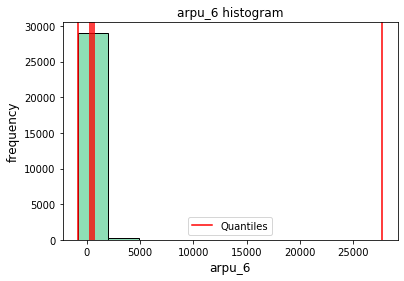

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for arpu_7 is 1443 datapoints.


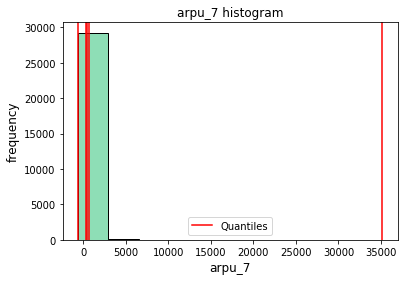

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for arpu_8 is 1365 datapoints.


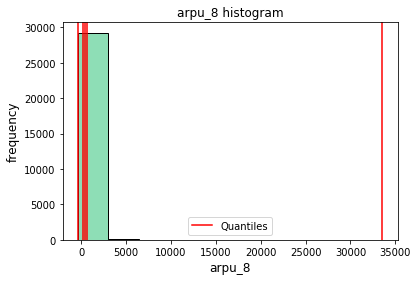

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for onnet_mou_6 is 3161 datapoints.


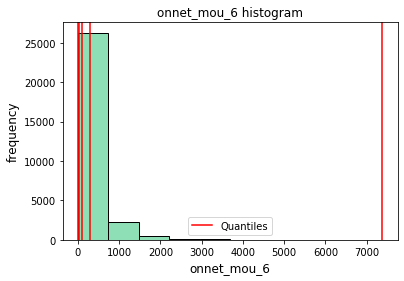

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for onnet_mou_7 is 3253 datapoints.


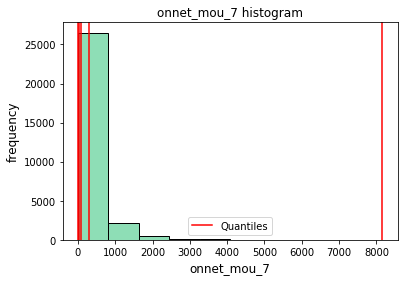

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for onnet_mou_8 is 3318 datapoints.


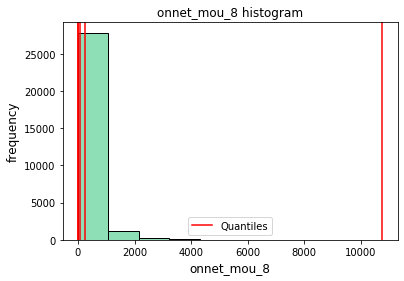

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for offnet_mou_6 is 1933 datapoints.


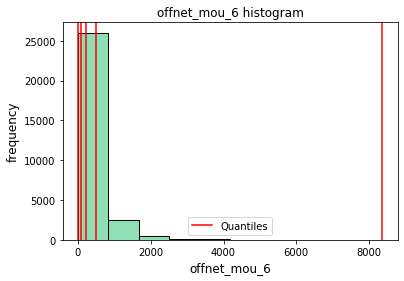

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for offnet_mou_7 is 1901 datapoints.


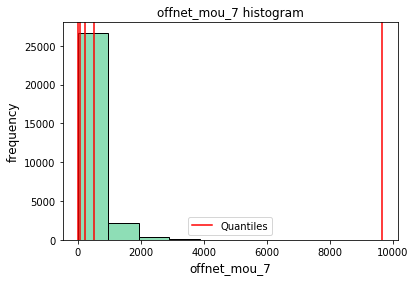

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for offnet_mou_8 is 1951 datapoints.


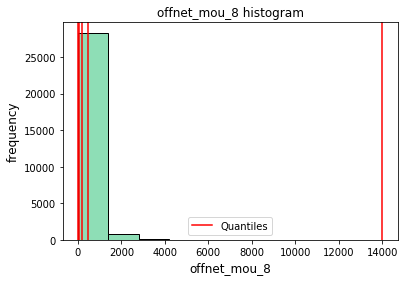

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for roam_ic_mou_6 is 3992 datapoints.


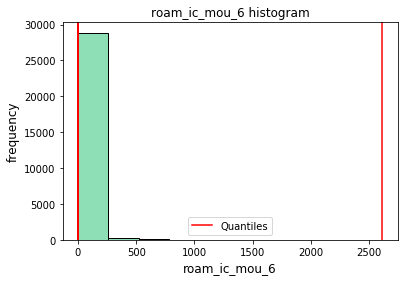

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for roam_ic_mou_7 is 3352 datapoints.


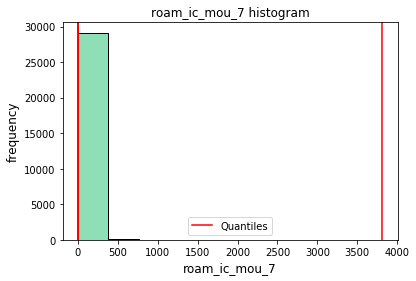

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for roam_ic_mou_8 is 3415 datapoints.


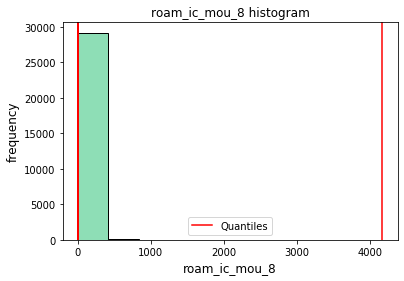

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for roam_og_mou_6 is 4657 datapoints.


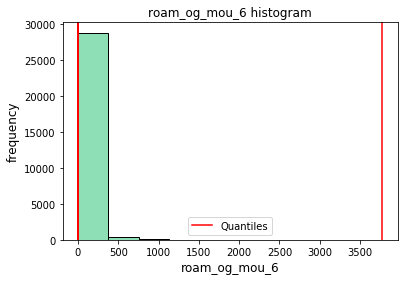

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for roam_og_mou_7 is 3947 datapoints.


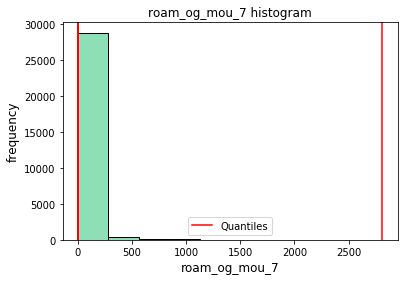

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for roam_og_mou_8 is 3977 datapoints.


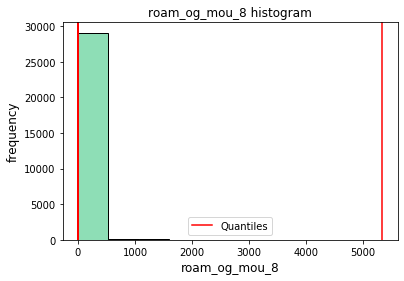

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for loc_og_t2t_mou_6 is 2781 datapoints.


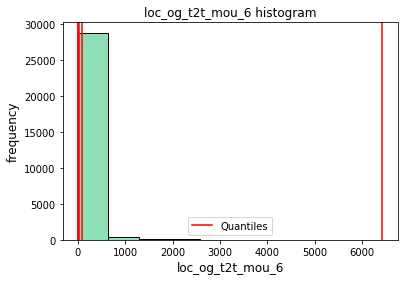

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for loc_og_t2t_mou_7 is 2813 datapoints.


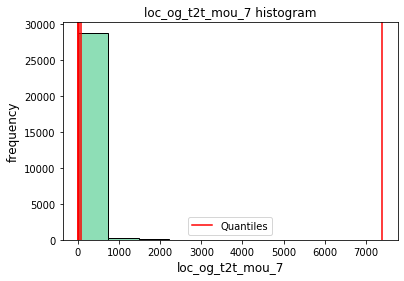

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for loc_og_t2t_mou_8 is 2790 datapoints.


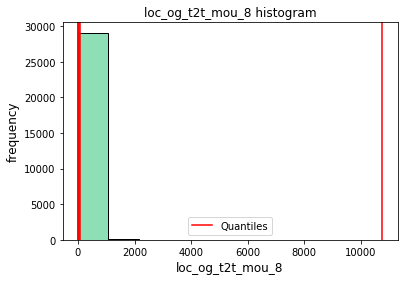

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for loc_og_t2m_mou_6 is 2133 datapoints.


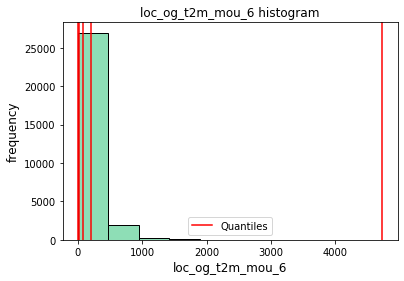

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for loc_og_t2m_mou_7 is 2182 datapoints.


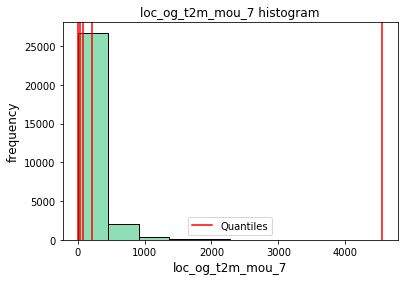

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for loc_og_t2m_mou_8 is 2144 datapoints.


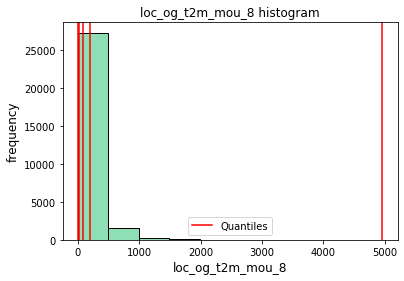

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for loc_og_t2f_mou_6 is 2256 datapoints.


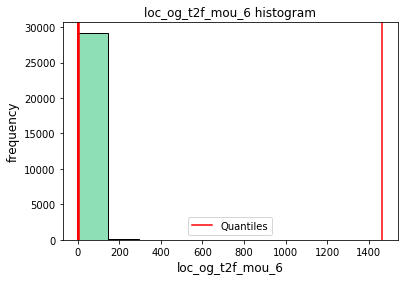

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for loc_og_t2f_mou_7 is 2243 datapoints.


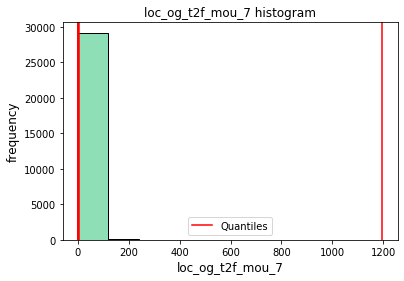

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for loc_og_t2f_mou_8 is 2215 datapoints.


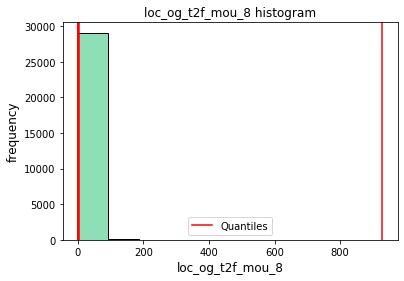

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for loc_og_t2c_mou_6 is 1665 datapoints.


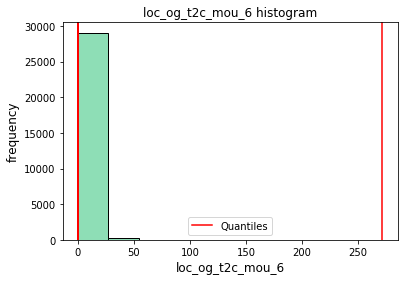

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for loc_og_t2c_mou_7 is 1729 datapoints.


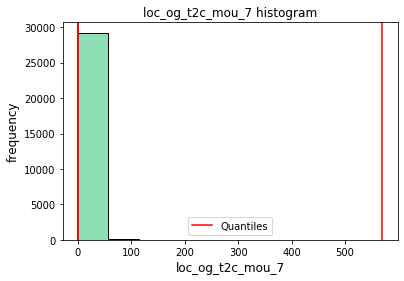

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for loc_og_t2c_mou_8 is 1705 datapoints.


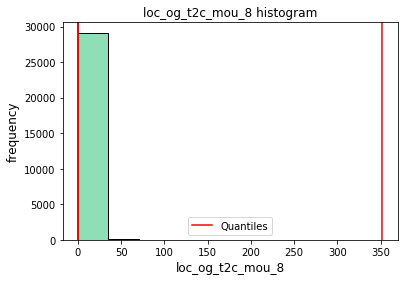

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for loc_og_mou_6 is 2000 datapoints.


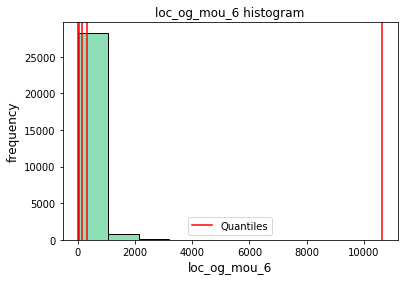

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for loc_og_mou_7 is 1973 datapoints.


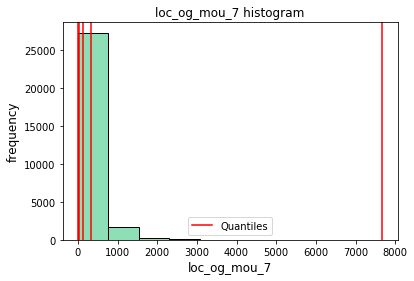

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for loc_og_mou_8 is 2014 datapoints.


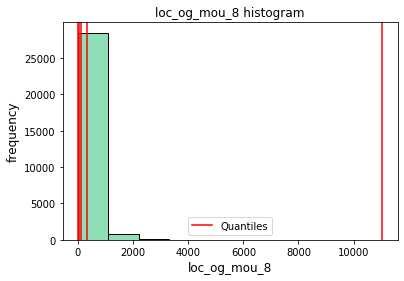

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for std_og_t2t_mou_6 is 4692 datapoints.


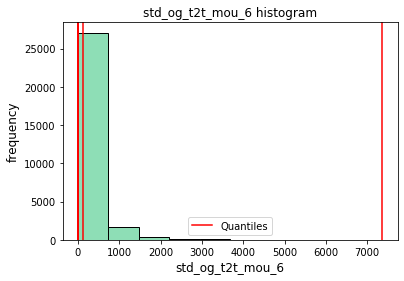

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for std_og_t2t_mou_7 is 4694 datapoints.


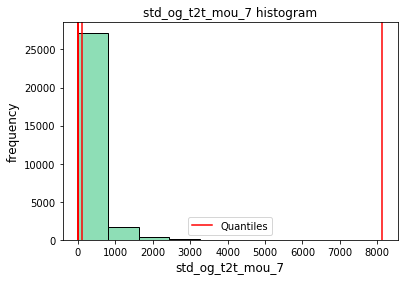

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for std_og_t2t_mou_8 is 4876 datapoints.


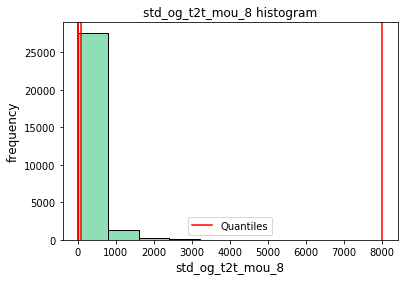

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for std_og_t2m_mou_6 is 3915 datapoints.


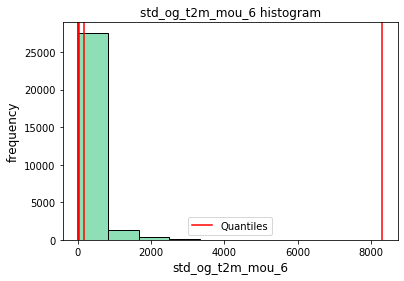

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for std_og_t2m_mou_7 is 3983 datapoints.


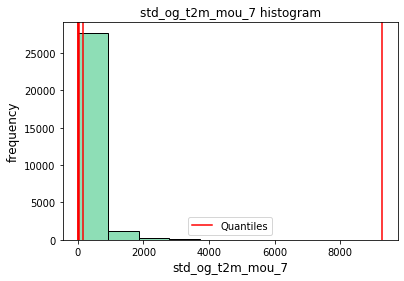

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for std_og_t2m_mou_8 is 4090 datapoints.


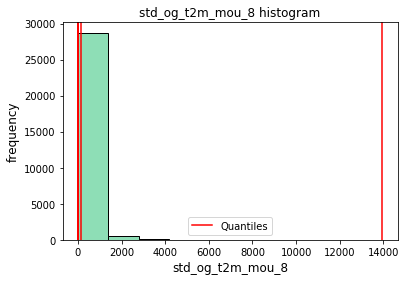

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for std_og_t2f_mou_6 is 1625 datapoints.


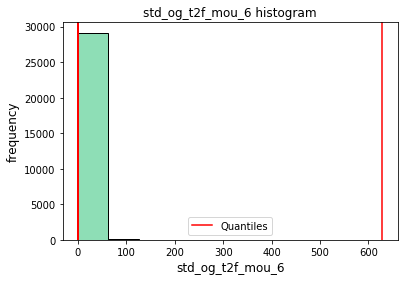

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for std_og_t2f_mou_7 is 1561 datapoints.


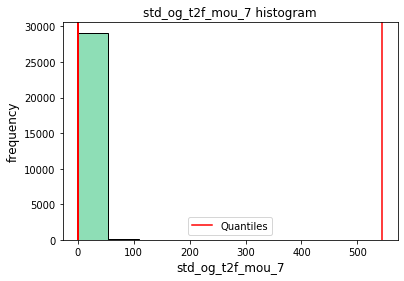

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for std_og_t2f_mou_8 is 1498 datapoints.


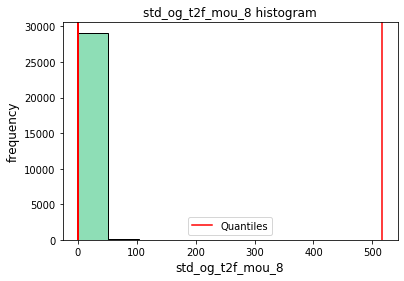

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for std_og_mou_6 is 2601 datapoints.


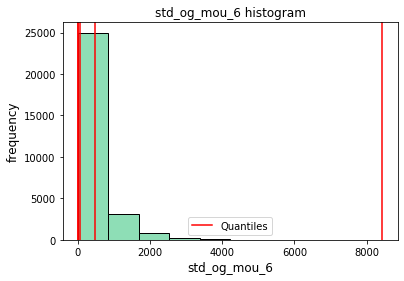

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for std_og_mou_7 is 2469 datapoints.


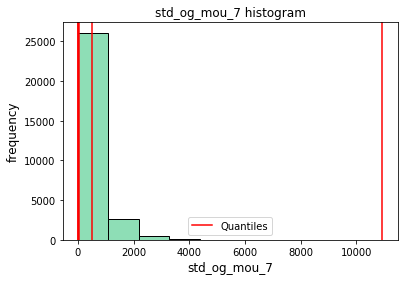

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for std_og_mou_8 is 3301 datapoints.


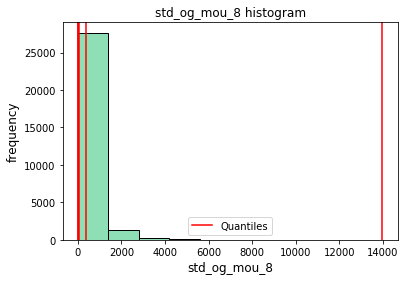

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for isd_og_mou_6 is 1001 datapoints.


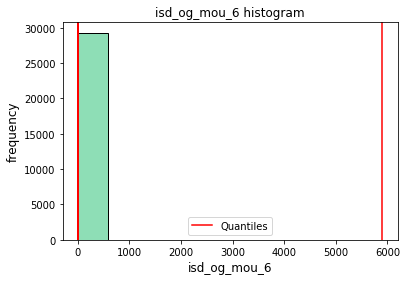

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for isd_og_mou_7 is 1016 datapoints.


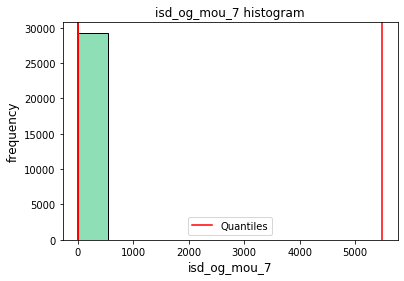

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for isd_og_mou_8 is 876 datapoints.


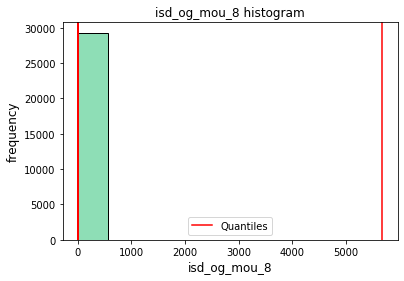

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for spl_og_mou_6 is 1993 datapoints.


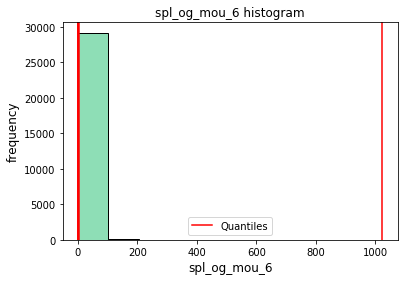

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for spl_og_mou_7 is 1951 datapoints.


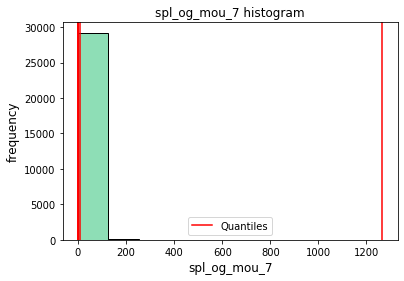

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for spl_og_mou_8 is 1966 datapoints.


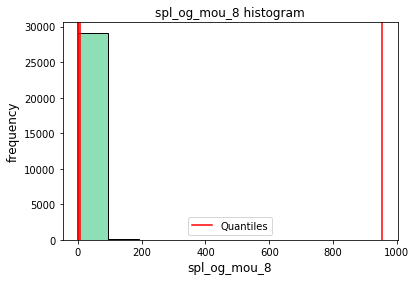

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for og_others_6 is 836 datapoints.


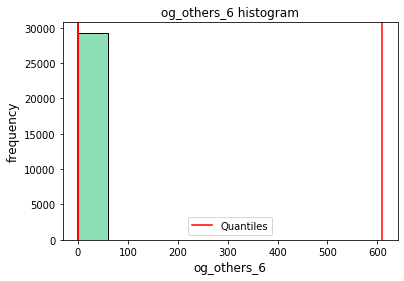

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for og_others_7 is 111 datapoints.


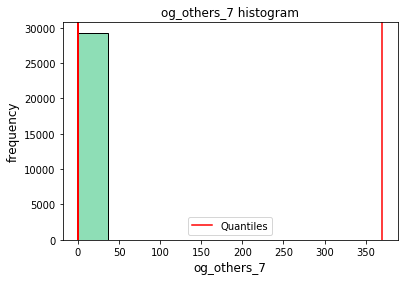

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for og_others_8 is 129 datapoints.


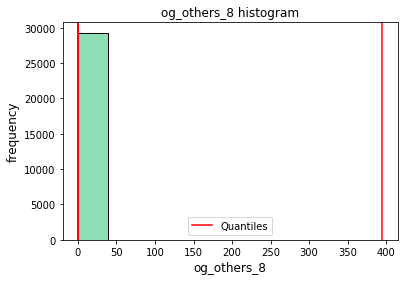

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for total_og_mou_6 is 1307 datapoints.


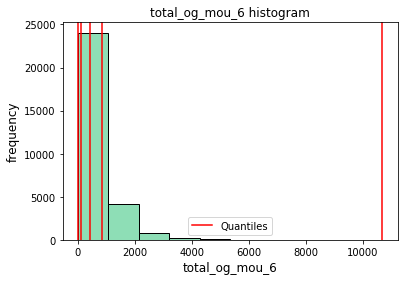

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for total_og_mou_7 is 1248 datapoints.


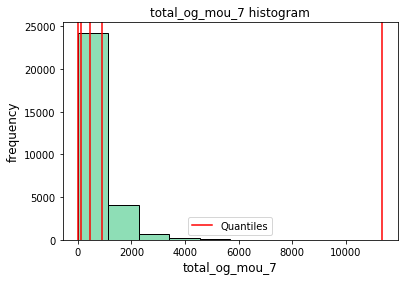

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for total_og_mou_8 is 1495 datapoints.


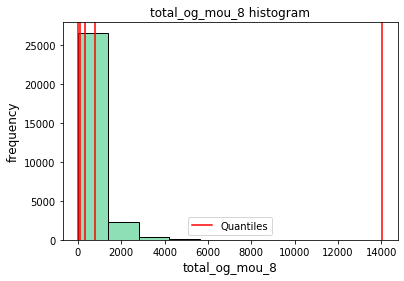

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for loc_ic_t2t_mou_6 is 2436 datapoints.


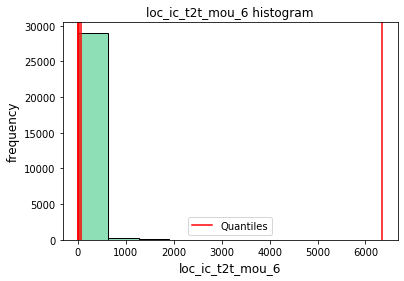

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for loc_ic_t2t_mou_7 is 2450 datapoints.


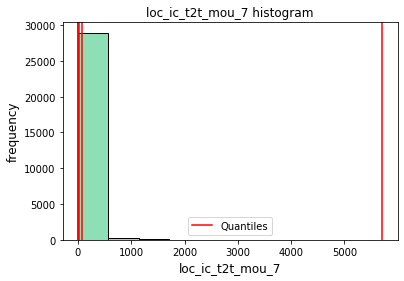

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for loc_ic_t2t_mou_8 is 2434 datapoints.


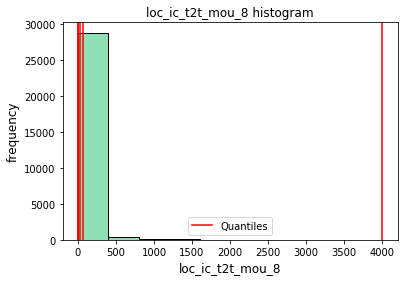

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for loc_ic_t2m_mou_6 is 2052 datapoints.


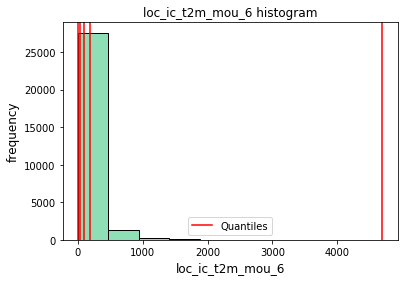

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for loc_ic_t2m_mou_7 is 2022 datapoints.


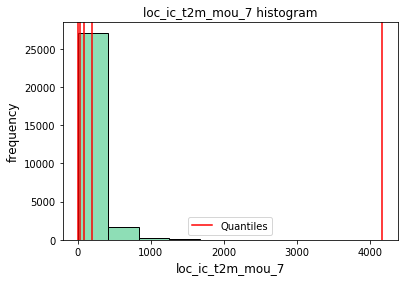

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for loc_ic_t2m_mou_8 is 2040 datapoints.


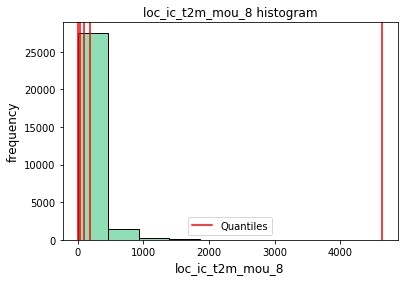

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for loc_ic_t2f_mou_6 is 2758 datapoints.


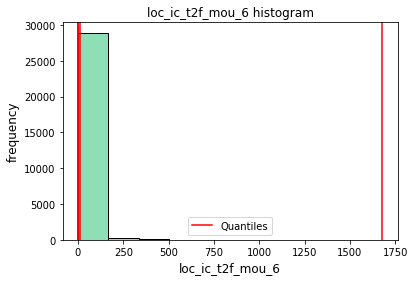

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for loc_ic_t2f_mou_7 is 2788 datapoints.


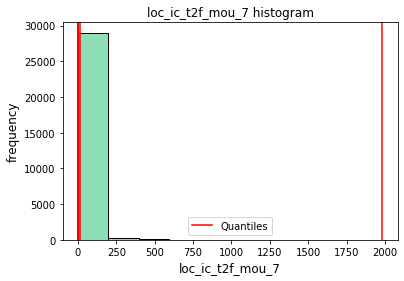

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for loc_ic_t2f_mou_8 is 2745 datapoints.


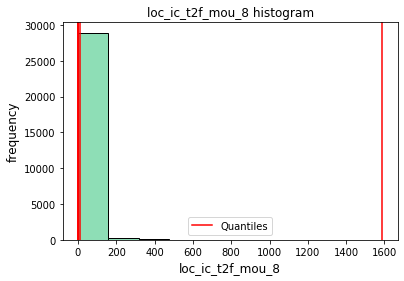

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for loc_ic_mou_6 is 1954 datapoints.


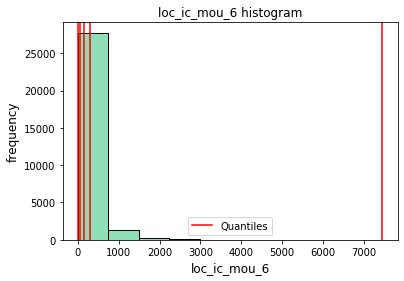

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for loc_ic_mou_7 is 1973 datapoints.


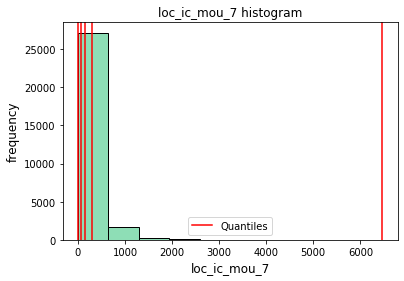

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for loc_ic_mou_8 is 2030 datapoints.


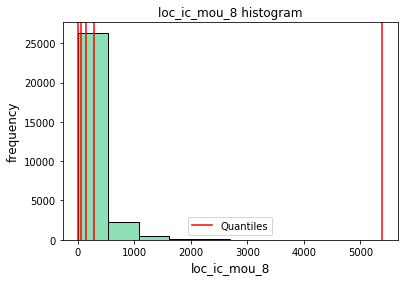

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for std_ic_t2t_mou_6 is 2874 datapoints.


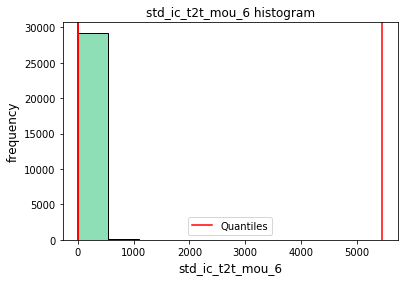

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for std_ic_t2t_mou_7 is 2883 datapoints.


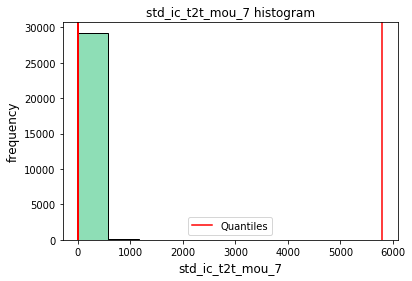

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for std_ic_t2t_mou_8 is 2923 datapoints.


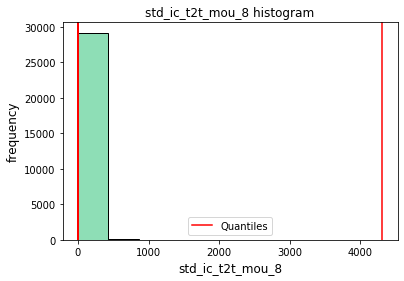

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for std_ic_t2m_mou_6 is 2866 datapoints.


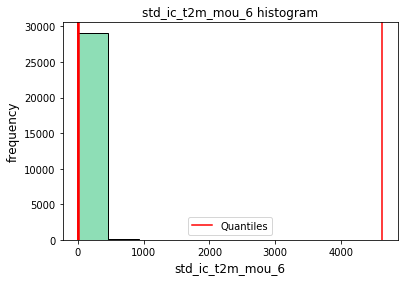

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for std_ic_t2m_mou_7 is 2793 datapoints.


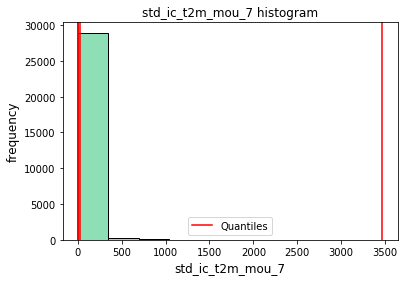

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for std_ic_t2m_mou_8 is 2841 datapoints.


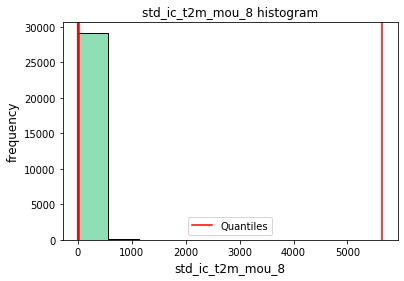

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for std_ic_t2f_mou_6 is 1913 datapoints.


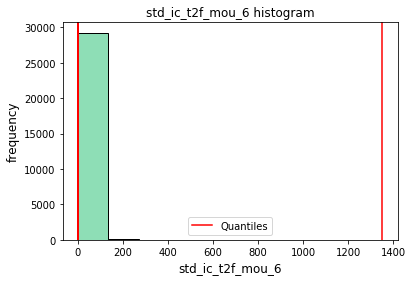

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for std_ic_t2f_mou_7 is 1961 datapoints.


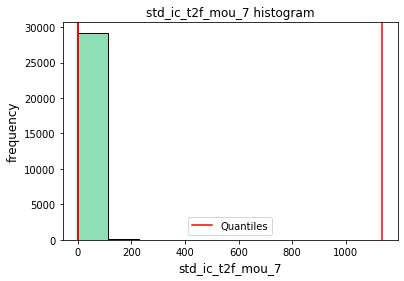

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for std_ic_t2f_mou_8 is 1855 datapoints.


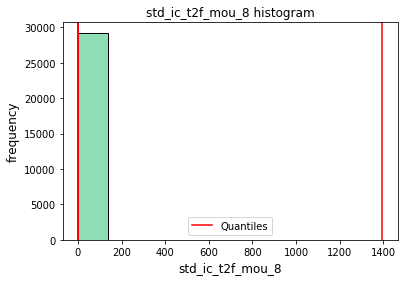

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for std_ic_mou_6 is 2798 datapoints.


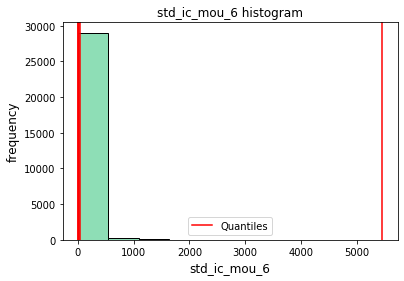

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for std_ic_mou_7 is 2722 datapoints.


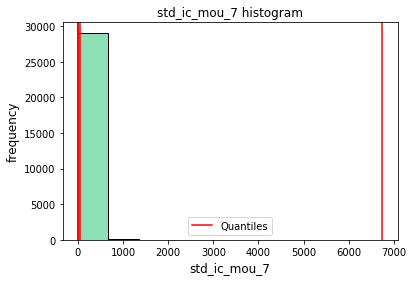

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for std_ic_mou_8 is 2809 datapoints.


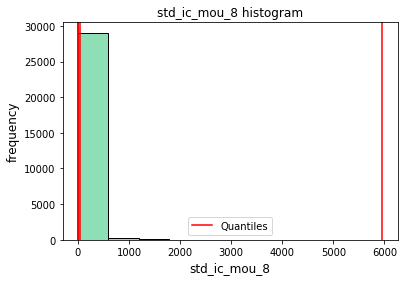

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for total_ic_mou_6 is 1882 datapoints.


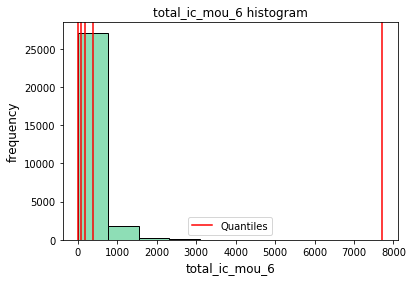

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for total_ic_mou_7 is 1897 datapoints.


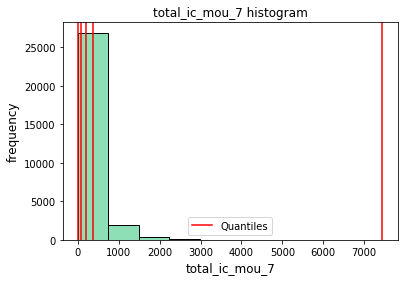

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for total_ic_mou_8 is 1877 datapoints.


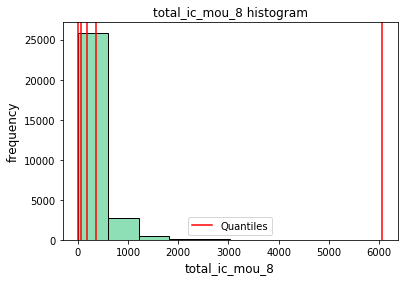

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for spl_ic_mou_6 is 77 datapoints.


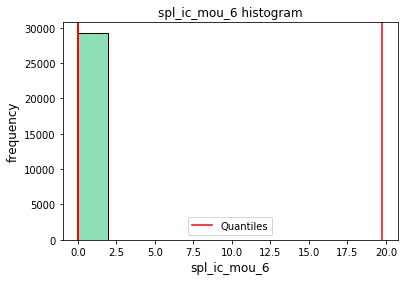

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for spl_ic_mou_7 is 91 datapoints.


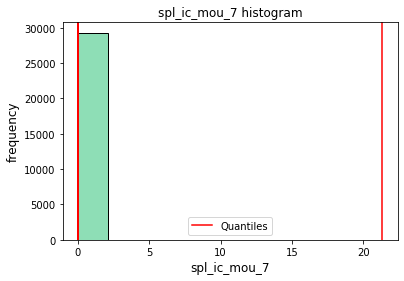

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for spl_ic_mou_8 is 79 datapoints.


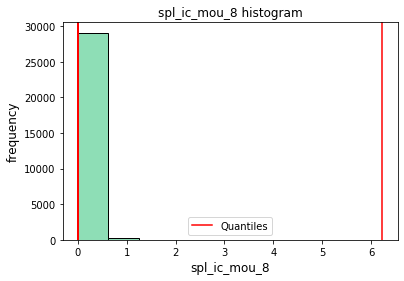

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for isd_ic_mou_6 is 3231 datapoints.


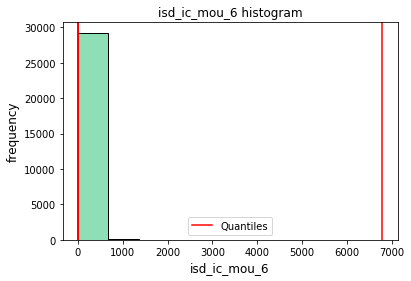

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for isd_ic_mou_7 is 3454 datapoints.


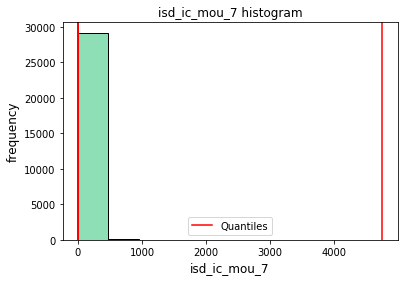

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for isd_ic_mou_8 is 3333 datapoints.


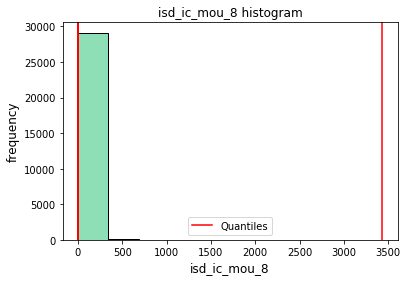

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for ic_others_6 is 1178 datapoints.


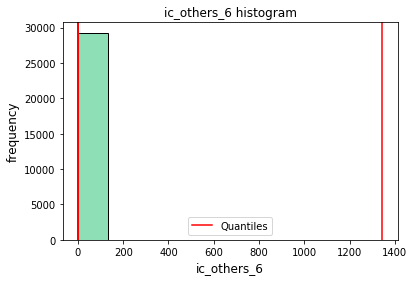

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for ic_others_7 is 1344 datapoints.


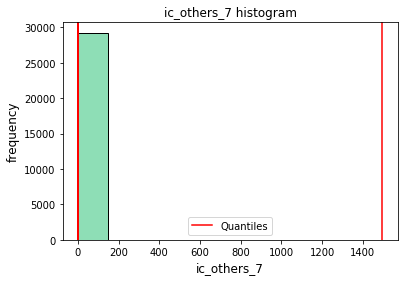

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for ic_others_8 is 1246 datapoints.


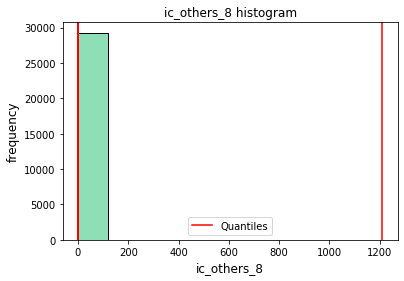

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for total_rech_num_6 is 71 datapoints.


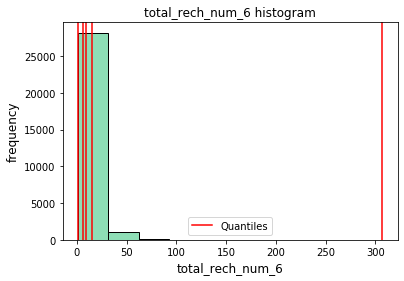

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for total_rech_num_7 is 71 datapoints.


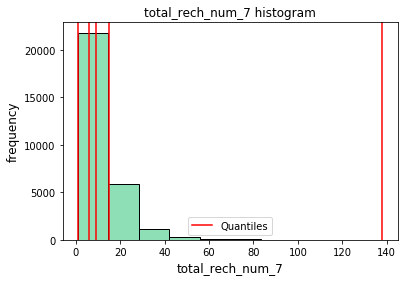

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for total_rech_num_8 is 69 datapoints.


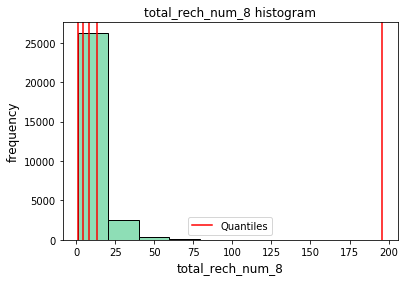

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for total_rech_amt_6 is 776 datapoints.


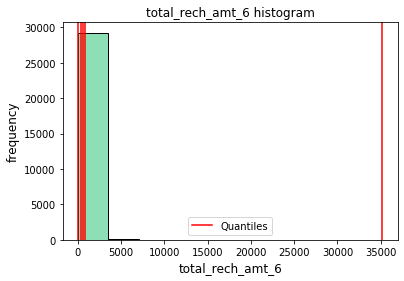

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for total_rech_amt_7 is 790 datapoints.


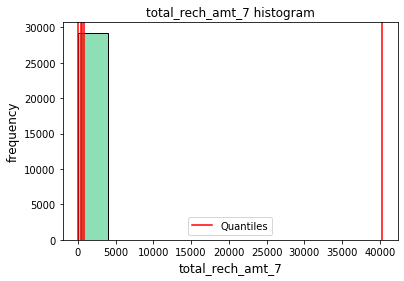

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for total_rech_amt_8 is 756 datapoints.


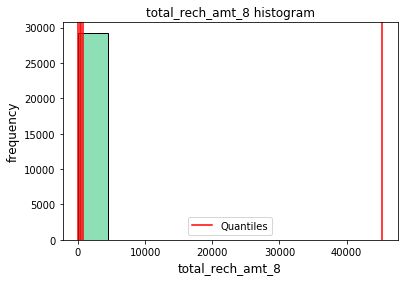

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for max_rech_amt_6 is 55 datapoints.


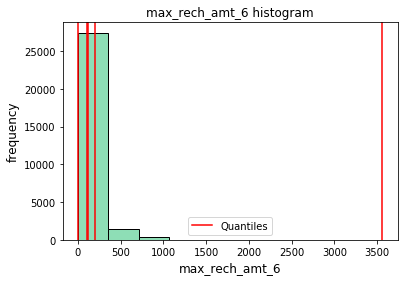

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for max_rech_amt_7 is 54 datapoints.


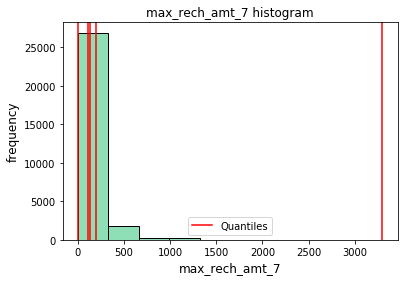

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for max_rech_amt_8 is 54 datapoints.


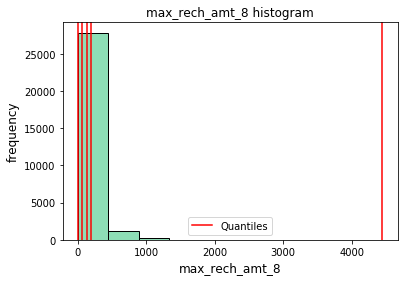

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for last_day_rch_amt_6 is 52 datapoints.


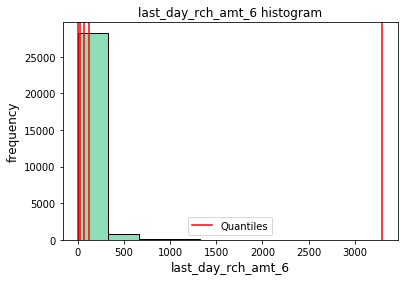

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for last_day_rch_amt_7 is 49 datapoints.


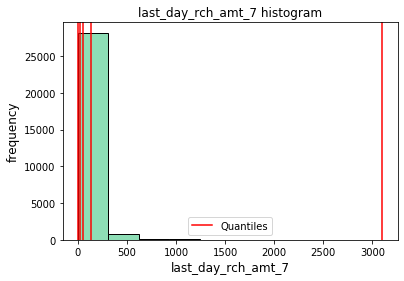

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for last_day_rch_amt_8 is 58 datapoints.


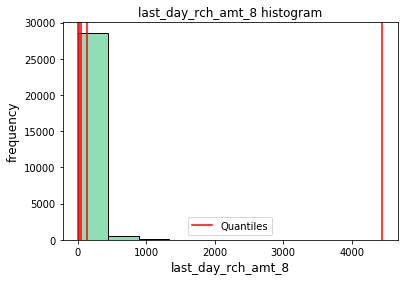

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for vol_2g_mb_6 is 4692 datapoints.


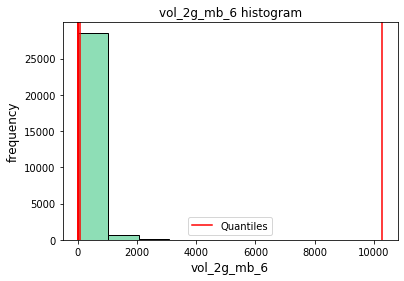

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for vol_2g_mb_7 is 4770 datapoints.


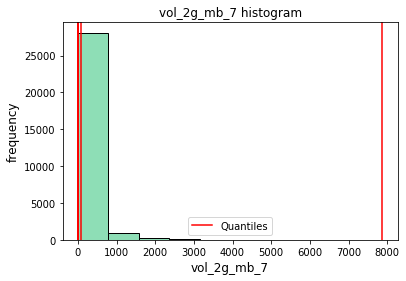

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for vol_2g_mb_8 is 4848 datapoints.


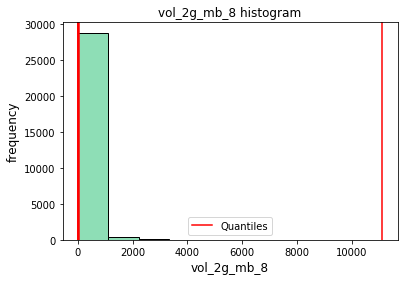

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for vol_3g_mb_6 is 3756 datapoints.


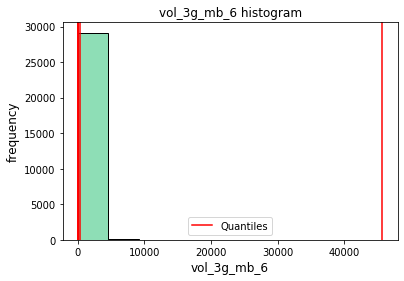

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for vol_3g_mb_7 is 3410 datapoints.


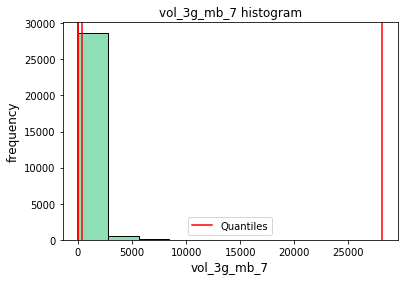

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for vol_3g_mb_8 is 3703 datapoints.


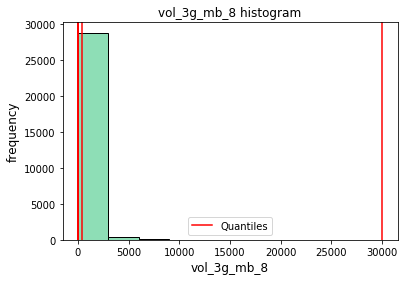

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for night_pck_user_6 is 1 datapoints.


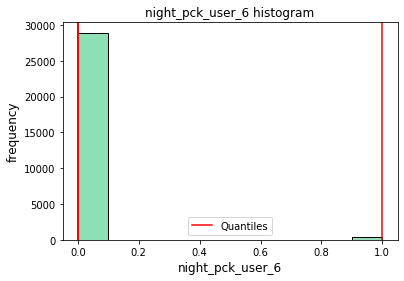

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for night_pck_user_7 is 1 datapoints.


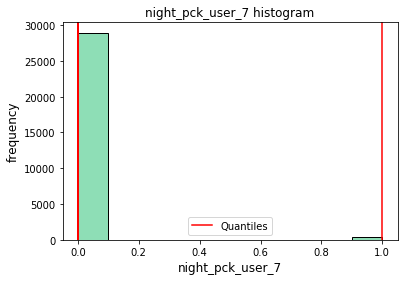

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for night_pck_user_8 is 1 datapoints.


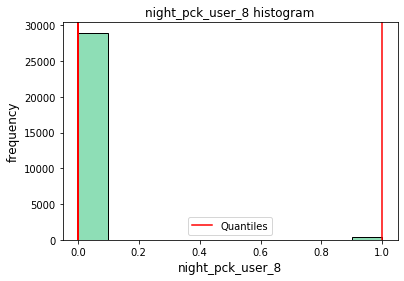

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for monthly_2g_6 is 4 datapoints.


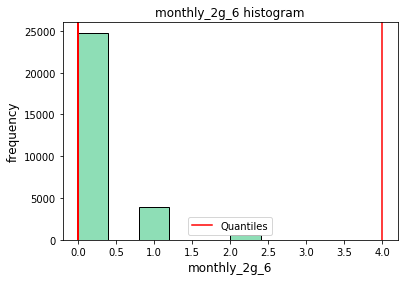

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for monthly_2g_7 is 5 datapoints.


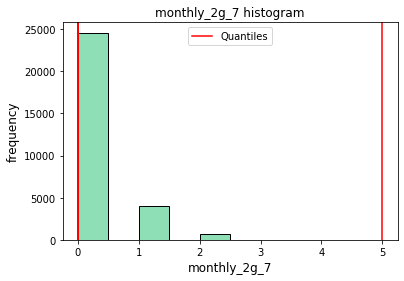

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for monthly_2g_8 is 5 datapoints.


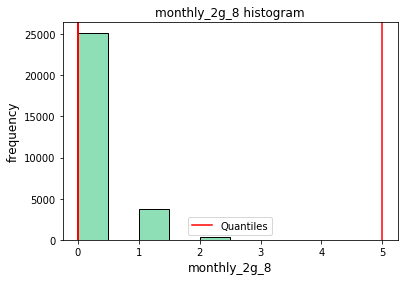

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for sachet_2g_6 is 28 datapoints.


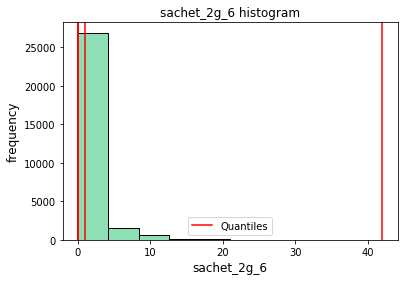

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for sachet_2g_7 is 32 datapoints.


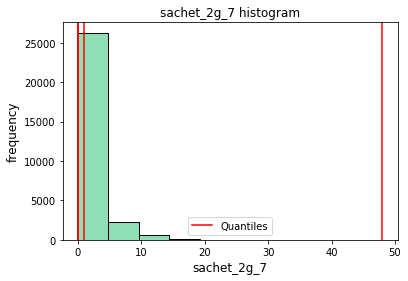

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for sachet_2g_8 is 31 datapoints.


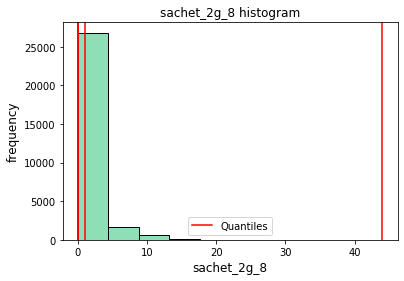

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for monthly_3g_6 is 11 datapoints.


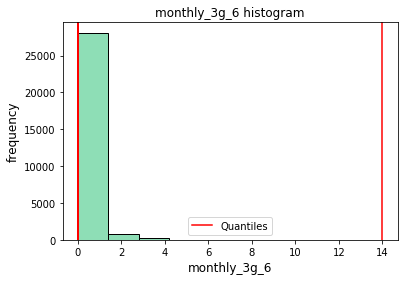

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for monthly_3g_7 is 14 datapoints.


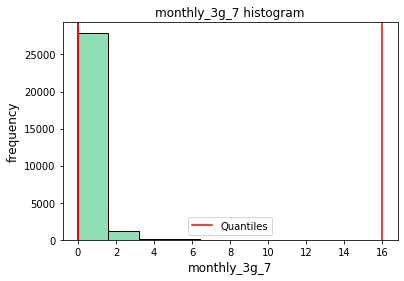

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for monthly_3g_8 is 11 datapoints.


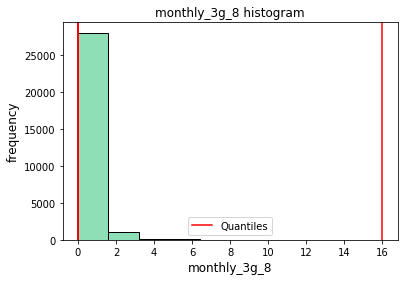

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for sachet_3g_6 is 24 datapoints.


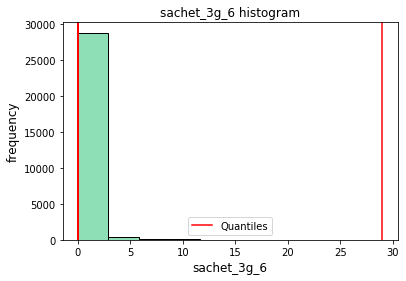

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for sachet_3g_7 is 26 datapoints.


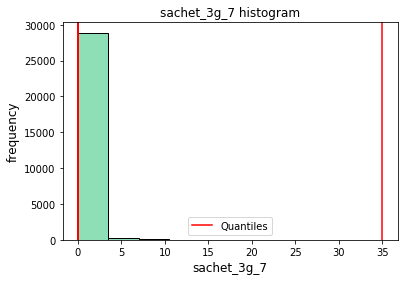

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for sachet_3g_8 is 28 datapoints.


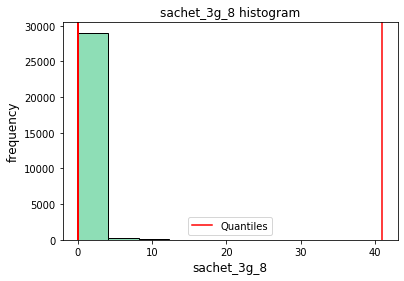

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for aon is 15 datapoints.


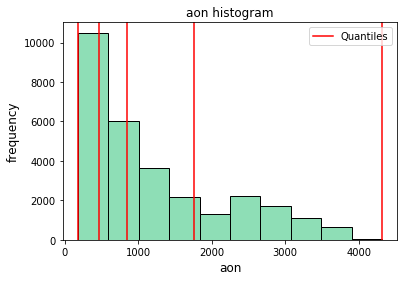

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for aug_vbc_3g is 4707 datapoints.


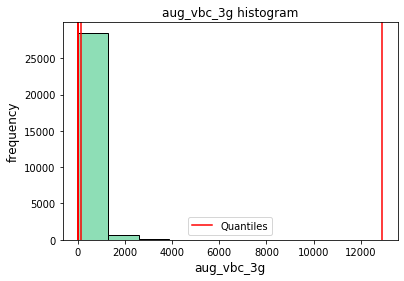

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for jul_vbc_3g is 4705 datapoints.


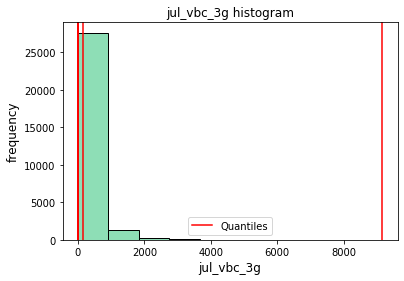

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for jun_vbc_3g is 5179 datapoints.


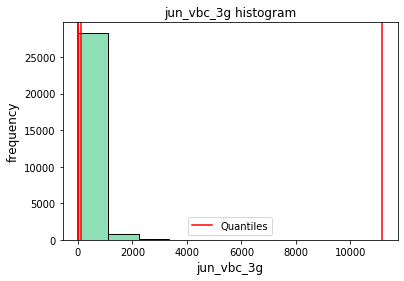

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for total_rech_amt_data_6 is 1101 datapoints.


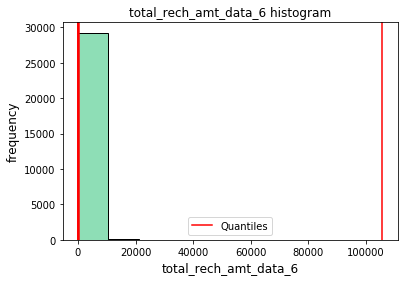

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for total_rech_amt_data_7 is 1036 datapoints.


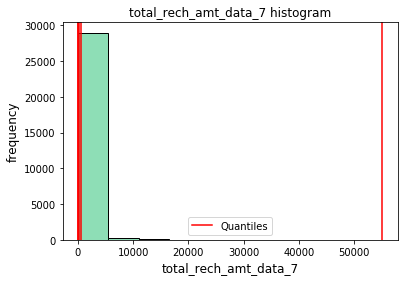

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for total_rech_6 is 1665 datapoints.


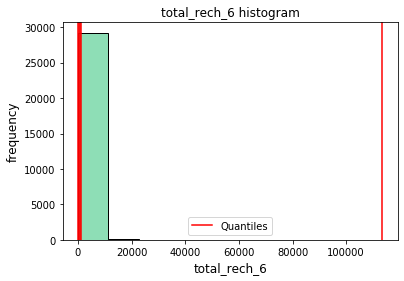

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for total_rech_7 is 1775 datapoints.


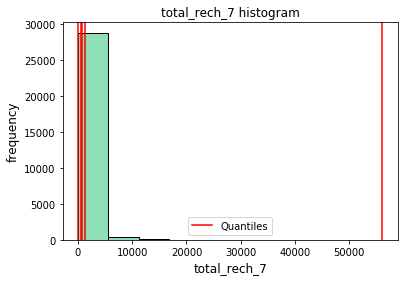

------------------------------------------------------------------------------------------------------------------------
Possible number of outliers for av_rech_amt_6n7 is 2075 datapoints.


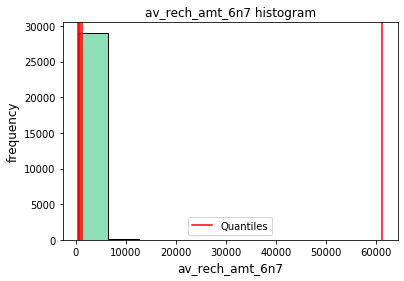

------------------------------------------------------------------------------------------------------------------------


In [86]:
#Loop to visualise and check possible outlier values for all the shortlisted variables
for i in check_list:
    check_outliers(check_df = high_value_customers_df, check_variable = i)

All the shortlisted variables seem to have outlier datapoints. We will check the skewness of all of these variables. 

In [87]:
#Create a dataframe to store skewness of all variables
all_variables_skewness_df = pd.DataFrame(high_value_customers_df.skew(axis = 0, skipna = True))

#Pull the quantiles from index as a seperate column
all_variables_skewness_df.reset_index(inplace=True)

#Rename the count column and variable names columns in the unique_values_df
all_variables_skewness_df = all_variables_skewness_df.rename(columns = {'index': 'variable',
                                                                       0:'skewness'})

#round up skewness valuess
all_variables_skewness_df['skewness'] = round(all_variables_skewness_df.skewness,0)

#Filter the shortlisted variables for outlier treatment from all_variables_skewness_df
all_variables_skewness_df[all_variables_skewness_df.variable.isin(check_list)]

#Check the unique values of variable skewness
all_variables_skewness_df.skewness.unique()

array([ 12.,  18.,  16.,   4.,   5.,   3.,  11.,  17.,  10.,   9.,  14.,
        13.,  26.,   7.,  91.,  84.,  89.,  15.,  19., 109., 111.,  99.,
        27.,  31.,  24.,  32.,  30.,  35.,  42.,  72.,  59.,  44.,  46.,
         6.,   8.,  -0.,   1.,  23.,  21.])

Considering that we are dealing with **high value customers** and the extreme data points may actually be some sort of **influential datpoints**. We will not trim any records by dropping possible outlier datapoints. Instead we will perform **Quantile-based Flooring and Capping** for each of the shortlisted variable.

1. For variables with skewness 1 to 10
    - cap at 0.99 quantile
    - floor at 0.01 quantile


2. For variables with skewness 11 to 100
    - cap at 0.95 quantile
    - floor at 0.01 quantile
    
3. For variables with skewness >100
    - cap at 0.90 quantile
    - floor at 0.01 quantile

We will create a user defined function to treat the anamolies identified in the above variables.

In [88]:
#Create a backup of high_value_customers_df in a csv format
#high_value_customers_df.to_csv('high_value_customers.csv')

In [89]:
#Create a copy of high_value_customers_df as cleaned_data_df
cleaned_data_df = high_value_customers_df.copy()

In [90]:
def treat_anamolies(cleaned_data_df,floor_quantile,cap_quantile, treatment_variable):
    
    #Compute the cap value and floor value for treatment_variable
    cap_value = cleaned_data_df[treatment_variable].quantile(cap_quantile)
    floor_value = cleaned_data_df[treatment_variable].quantile(floor_quantile)
    
    #Check the proportion of records being treated
    prop_to_cap = round((len((cleaned_data_df[cleaned_data_df[treatment_variable]>cap_value]))/len(cleaned_data_df)) * 100,2)
    prop_to_floor = round((len((cleaned_data_df[cleaned_data_df[treatment_variable]<floor_value]))/len(cleaned_data_df)) * 100,2)
    print('Proportion of records capped due to anamoly treatment of',treatment_variable,prop_to_cap, '%')
    print('Proportion of records floored due to anamoly treatment of',treatment_variable,prop_to_floor, '%')
    
    #Treat the outliers
    print('Skewness of variable',treatment_variable,'before outlier treatment is',round(cleaned_data_df[treatment_variable].skew(),0))
    cleaned_data_df[treatment_variable] = np.where(cleaned_data_df[treatment_variable]>cap_value, cap_value,cleaned_data_df[treatment_variable])
    cleaned_data_df[treatment_variable] = np.where(cleaned_data_df[treatment_variable]<floor_value, floor_value,cleaned_data_df[treatment_variable])
    print('Skewness of variable',treatment_variable,'after outlier treatment is',round(cleaned_data_df[treatment_variable].skew(),0))
    
    return(cleaned_data_df)

Treat anamolies for variables with skewness 1 to 10.

In [91]:
#Create a list of variables with skewness 1 to 10 to treat for outliers
treatment_variables_df = all_variables_skewness_df[(all_variables_skewness_df['skewness']>=1) & (all_variables_skewness_df['skewness']<=10)]
treatment_variables_list = list(treatment_variables_df['variable'])

#Loop to treat the variables by calling user defined function
for current_variable in treatment_variables_list:
    print('Treating outliers in variable', current_variable)
    
    #Set quantile limits, variable to treat and call the function to treat anamolies
    cleaned_data_df = treat_anamolies(cleaned_data_df = cleaned_data_df,
                                      floor_quantile = 0.01,
                                      cap_quantile = 0.99,
                                      treatment_variable = current_variable)
    print('\n')

Treating outliers in variable onnet_mou_6
Proportion of records capped due to anamoly treatment of onnet_mou_6 1.0 %
Proportion of records floored due to anamoly treatment of onnet_mou_6 0.0 %
Skewness of variable onnet_mou_6 before outlier treatment is 4.0
Skewness of variable onnet_mou_6 after outlier treatment is 3.0


Treating outliers in variable onnet_mou_7
Proportion of records capped due to anamoly treatment of onnet_mou_7 1.0 %
Proportion of records floored due to anamoly treatment of onnet_mou_7 0.0 %
Skewness of variable onnet_mou_7 before outlier treatment is 4.0
Skewness of variable onnet_mou_7 after outlier treatment is 3.0


Treating outliers in variable onnet_mou_8
Proportion of records capped due to anamoly treatment of onnet_mou_8 1.0 %
Proportion of records floored due to anamoly treatment of onnet_mou_8 0.0 %
Skewness of variable onnet_mou_8 before outlier treatment is 5.0
Skewness of variable onnet_mou_8 after outlier treatment is 3.0


Treating outliers in variabl

Skewness of variable loc_ic_mou_7 before outlier treatment is 4.0
Skewness of variable loc_ic_mou_7 after outlier treatment is 2.0


Treating outliers in variable loc_ic_mou_8
Proportion of records capped due to anamoly treatment of loc_ic_mou_8 1.0 %
Proportion of records floored due to anamoly treatment of loc_ic_mou_8 0.0 %
Skewness of variable loc_ic_mou_8 before outlier treatment is 4.0
Skewness of variable loc_ic_mou_8 after outlier treatment is 2.0


Treating outliers in variable total_ic_mou_6
Proportion of records capped due to anamoly treatment of total_ic_mou_6 1.0 %
Proportion of records floored due to anamoly treatment of total_ic_mou_6 0.0 %
Skewness of variable total_ic_mou_6 before outlier treatment is 4.0
Skewness of variable total_ic_mou_6 after outlier treatment is 2.0


Treating outliers in variable total_ic_mou_7
Proportion of records capped due to anamoly treatment of total_ic_mou_7 1.0 %
Proportion of records floored due to anamoly treatment of total_ic_mou_7 0.0

Proportion of records capped due to anamoly treatment of sachet_2g_6 0.72 %
Proportion of records floored due to anamoly treatment of sachet_2g_6 0.0 %
Skewness of variable sachet_2g_6 before outlier treatment is 4.0
Skewness of variable sachet_2g_6 after outlier treatment is 3.0


Treating outliers in variable sachet_2g_7
Proportion of records capped due to anamoly treatment of sachet_2g_7 0.89 %
Proportion of records floored due to anamoly treatment of sachet_2g_7 0.0 %
Skewness of variable sachet_2g_7 before outlier treatment is 3.0
Skewness of variable sachet_2g_7 after outlier treatment is 3.0


Treating outliers in variable sachet_2g_8
Proportion of records capped due to anamoly treatment of sachet_2g_8 0.82 %
Proportion of records floored due to anamoly treatment of sachet_2g_8 0.0 %
Skewness of variable sachet_2g_8 before outlier treatment is 4.0
Skewness of variable sachet_2g_8 after outlier treatment is 3.0


Treating outliers in variable monthly_3g_6
Proportion of records ca

Treat anamolies for variables with skewness 11 to 100.

In [92]:
#Create a list of variables with skewness 1 to 10 to treat for outliers
treatment_variables_df = all_variables_skewness_df[(all_variables_skewness_df['skewness']>=11) & (all_variables_skewness_df['skewness']<=100)]
treatment_variables_list = list(treatment_variables_df['variable'])

#Loop to treat the variables by calling user defined function
for current_variable in treatment_variables_list:
    print('Treating outliers in variable', current_variable)
    
    #Set quantile limits, variable to treat and call the function to treat anamolies
    cleaned_data_df = treat_anamolies(cleaned_data_df = cleaned_data_df,
                                      floor_quantile = 0.01,
                                      cap_quantile = 0.95,
                                      treatment_variable = current_variable)
    print('\n')

Treating outliers in variable arpu_6
Proportion of records capped due to anamoly treatment of arpu_6 5.0 %
Proportion of records floored due to anamoly treatment of arpu_6 1.0 %
Skewness of variable arpu_6 before outlier treatment is 12.0
Skewness of variable arpu_6 after outlier treatment is 1.0


Treating outliers in variable arpu_7
Proportion of records capped due to anamoly treatment of arpu_7 5.0 %
Proportion of records floored due to anamoly treatment of arpu_7 1.0 %
Skewness of variable arpu_7 before outlier treatment is 18.0
Skewness of variable arpu_7 after outlier treatment is 1.0


Treating outliers in variable arpu_8
Proportion of records capped due to anamoly treatment of arpu_8 5.0 %
Proportion of records floored due to anamoly treatment of arpu_8 0.22 %
Skewness of variable arpu_8 before outlier treatment is 16.0
Skewness of variable arpu_8 after outlier treatment is 1.0


Treating outliers in variable roam_ic_mou_6
Proportion of records capped due to anamoly treatment o

Treating outliers in variable std_ic_t2t_mou_7
Proportion of records capped due to anamoly treatment of std_ic_t2t_mou_7 5.0 %
Proportion of records floored due to anamoly treatment of std_ic_t2t_mou_7 0.0 %
Skewness of variable std_ic_t2t_mou_7 before outlier treatment is 31.0
Skewness of variable std_ic_t2t_mou_7 after outlier treatment is 2.0


Treating outliers in variable std_ic_t2t_mou_8
Proportion of records capped due to anamoly treatment of std_ic_t2t_mou_8 5.0 %
Proportion of records floored due to anamoly treatment of std_ic_t2t_mou_8 0.0 %
Skewness of variable std_ic_t2t_mou_8 before outlier treatment is 24.0
Skewness of variable std_ic_t2t_mou_8 after outlier treatment is 2.0


Treating outliers in variable std_ic_t2m_mou_6
Proportion of records capped due to anamoly treatment of std_ic_t2m_mou_6 5.0 %
Proportion of records floored due to anamoly treatment of std_ic_t2m_mou_6 0.0 %
Skewness of variable std_ic_t2m_mou_6 before outlier treatment is 14.0
Skewness of variable 

Skewness of variable sachet_3g_7 before outlier treatment is 11.0
Skewness of variable sachet_3g_7 after outlier treatment is 3.0


Treating outliers in variable sachet_3g_8
Proportion of records capped due to anamoly treatment of sachet_3g_8 3.42 %
Proportion of records floored due to anamoly treatment of sachet_3g_8 0.0 %
Skewness of variable sachet_3g_8 before outlier treatment is 13.0
Skewness of variable sachet_3g_8 after outlier treatment is 3.0


Treating outliers in variable total_rech_amt_data_6
Proportion of records capped due to anamoly treatment of total_rech_amt_data_6 5.0 %
Proportion of records floored due to anamoly treatment of total_rech_amt_data_6 0.0 %
Skewness of variable total_rech_amt_data_6 before outlier treatment is 23.0
Skewness of variable total_rech_amt_data_6 after outlier treatment is 2.0


Treating outliers in variable total_rech_amt_data_7
Proportion of records capped due to anamoly treatment of total_rech_amt_data_7 4.78 %
Proportion of records floored

Treat anamolies for variables with skewness >100.

In [93]:
#Create a list of variables with skewness 1 to 10 to treat for outliers
treatment_variables_df = all_variables_skewness_df[(all_variables_skewness_df['skewness']>100)]
treatment_variables_list = list(treatment_variables_df['variable'])

#Loop to treat the variables by calling user defined function
for current_variable in treatment_variables_list:
    print('Treating outliers in variable', current_variable)
    
    #Set quantile limits, variable to treat and call the function to treat anamolies
    cleaned_data_df = treat_anamolies(cleaned_data_df = cleaned_data_df,
                                      floor_quantile = 0.01,
                                      cap_quantile = 0.90,
                                      treatment_variable = current_variable)
    print('\n')

Treating outliers in variable og_others_6
Proportion of records capped due to anamoly treatment of og_others_6 9.94 %
Proportion of records floored due to anamoly treatment of og_others_6 0.0 %
Skewness of variable og_others_6 before outlier treatment is 109.0
Skewness of variable og_others_6 after outlier treatment is 2.0


Treating outliers in variable og_others_7
Proportion of records capped due to anamoly treatment of og_others_7 0.5 %
Proportion of records floored due to anamoly treatment of og_others_7 0.0 %
Skewness of variable og_others_7 before outlier treatment is 111.0
Skewness of variable og_others_7 after outlier treatment is 0




Check the revised skewness of the anamoly treated variables.

In [94]:
#Create a dataframe to store skewness of all variables
all_variables_skewness_df = pd.DataFrame(cleaned_data_df.skew(axis = 0, skipna = True))

#Pull the quantiles from index as a seperate column
all_variables_skewness_df.reset_index(inplace=True)

#Rename the count column and variable names columns in the unique_values_df
all_variables_skewness_df = all_variables_skewness_df.rename(columns = {'index': 'variable',
                                                                       0:'skewness'})

#round up skewness valuess
all_variables_skewness_df['skewness'] = round(all_variables_skewness_df.skewness,0)

#Filter the shortlisted variables for outlier treatment from all_variables_skewness_df
all_variables_skewness_df[all_variables_skewness_df.variable.isin(check_list)]

#Check the unique values of variable skewness
all_variables_skewness_df.skewness.unique()

array([1., 3., 2., 5., 4., 0., 8., 9.])

Thus, we have logically treated anamolies in the modeling data using **Quantile-based Flooring and Capping** for each of the shortlisted variable. We will now proceed to **derive new variables**.


#### <font color = Blue> **Step 8: Derive new variables**</font>

In [95]:
#Create a backup of cleaned_data_df into a csv
cleaned_data_df.to_csv('cleaned_data_df.csv')

**Derived Variable #1**:


Considering that tenure of a prepaid customer is an important indicator of customers association with the telecom operator, we will focus on raw variable **aon** i.e. age on network - number of days the customer is using the operator T network to roll it up on monthly level and group it to derive new variable **aon_months_group**.

In [96]:
#Check the data type of aon variable
print(cleaned_data_df['aon'].dtypes)

#Convert values of aon from days to months 
cleaned_data_df['aon_months'] = round(cleaned_data_df['aon']/30,0)

#Drop the raw variable aon
cleaned_data_df.drop('aon', axis=1, inplace=True)

#Check the new derived variables aon_months
cleaned_data_df['aon_months'].head()

float64


0     32.0
7     27.0
8     10.0
21    24.0
23    20.0
Name: aon_months, dtype: float64

We will make use of adaptive binning to create logical bins of from aon in months to further derive tenure of customer variable.

In [97]:
#Set the quantiles for binning
quantile_list = [0, .25, .5, .75, 1.]
quantile_list

[0, 0.25, 0.5, 0.75, 1.0]

We will create a user defined function to identify the adaptive bin cuts for each of the quantitative variables and then do the binning.

In [98]:
def generate_bins(cleaned_data_df, quantile_list, current_variable):
    
    #Genearte the quantile values
    quantiles = cleaned_data_df[current_variable].quantile(quantile_list)

    #Plot histogram
    fig, ax = plt.subplots()
    cleaned_data_df[current_variable].hist(color='#8ec3de', edgecolor='black', grid=False)

    #Plot bin cuts over histogram
    for quantile in quantiles:
        bin_cut = plt.axvline(quantile, color='r')
    ax.legend([bin_cut], ['Quantiles'], fontsize=10)

    #Label axis
    title = current_variable + ' histogram'
    ax.set_title(title, fontsize=12)
    ax.set_xlabel(current_variable, fontsize=12)
    ax.set_ylabel('frequency', fontsize=12)

    plt.show()

    #Check the binning values
    quantiles_df = pd.DataFrame(cleaned_data_df[current_variable].quantile(quantile_list))

    #Pull the quantiles from index as a seperate column
    quantiles_df.reset_index(inplace=True)

    #Rename the count column and variable names columns in the unique_values_df
    quantiles_df = quantiles_df.rename(columns = {'index': 'quantile'})

    print(quantiles_df)

Check the distribution and identify the bins for binning **aon_months** variable for modeling.

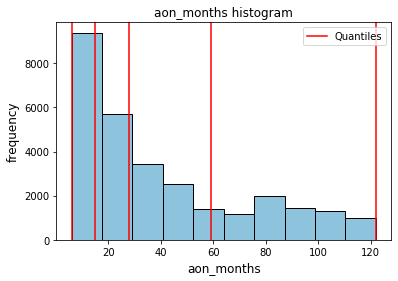

   quantile  aon_months
0      0.00         6.0
1      0.25        15.0
2      0.50        28.0
3      0.75        59.0
4      1.00       122.0


In [99]:
#Set the variable to bin
current_variable = 'aon_months'

#Call user defined function to bin
generate_bins(cleaned_data_df = cleaned_data_df, quantile_list = quantile_list, current_variable = current_variable)

Thus, our **adaptive binning** groups for **aon_months** would be:
1. 0 - 15
2. 16 - 28
3. 29 - 59
4. 60 - 122

Now lets apply these groups and update cleaned_data_df.

In [100]:
#Set the adaptive binning groups
bin_labels = ['0-15', '16-28', '29-59','60-122']

#Create new categorical variable
current_variable_group = current_variable + '_group'
cleaned_data_df[current_variable_group] = pd.qcut(cleaned_data_df[current_variable], q = quantile_list,labels = bin_labels)

#View newly derived variables
cleaned_data_df.head(5)

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,jul_vbc_3g,jun_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_6,total_rech_7,av_rech_amt_6n7,churn,aon_months,aon_months_group
0,197.385,214.8160,213.8030,89.21,88.36,0.00,229.44,228.73,0.00,0.00,...,0.00,101.20,252.0,252.0,614.0,504.0,559.0,1.0,32.0,29-59
7,1069.180,1263.2492,1262.5798,57.84,54.68,52.29,453.43,567.16,325.91,16.23,...,19.38,18.74,0.0,0.0,1580.0,790.0,1185.0,1.0,27.0,16-28
8,378.721,492.2230,137.3620,413.69,351.03,35.08,94.66,80.63,136.48,0.00,...,910.65,122.16,0.0,354.0,437.0,955.0,696.0,0.0,10.0,0-15
21,514.453,597.7530,637.7600,102.41,132.11,85.14,757.93,896.68,983.39,0.00,...,0.00,0.00,0.0,0.0,600.0,680.0,640.0,0.0,24.0,16-28
23,74.350,193.8970,366.9660,48.96,50.66,33.58,85.41,89.36,205.89,0.00,...,51.86,0.00,0.0,712.0,0.0,1166.0,583.0,0.0,20.0,16-28


In [101]:
#Drop original variables aon_months
cleaned_data_df.drop('aon_months', axis=1, inplace=True)

Binning successful for original variable **aon** to **aon_months_group**.

**Derived Variable #2**:


Considering that revenue of a prepaid customer is an important indicator of customers association with the telecom operator, we will focus on raw variable **arpu** i.e. Average revenue per user generated for the operator T network and derive new variable **arpu_change** for change i.e. drop or increase of arpu from good phase to action phase.

In [102]:
#Compute average arup for motnhs 6 & 7 - change withing good to good phase
cleaned_data_df['arpu_change_6n7'] = (cleaned_data_df['arpu_7'] - cleaned_data_df['arpu_6'])/cleaned_data_df['arpu_6']

#Compute average arup for motnhs 7 & 8 - change over from good to action phase
cleaned_data_df['arpu_change_7n8'] = (cleaned_data_df['arpu_8'] - cleaned_data_df['arpu_7'])/cleaned_data_df['arpu_7']

cleaned_data_df['arpu_change'] = round((cleaned_data_df['arpu_change_7n8'] - cleaned_data_df['arpu_change_6n7']),0)

#Bin the arpu change
cleaned_data_df['arpu_change'] = np.where(cleaned_data_df['arpu_change']>0, 'incremental','decremental')
cleaned_data_df['arpu_change'] = np.where(cleaned_data_df['arpu_change']==0, 'nochange',cleaned_data_df['arpu_change'])

#View the derived variable
cleaned_data_df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_6,total_rech_7,av_rech_amt_6n7,churn,aon_months_group,arpu_change_6n7,arpu_change_7n8,arpu_change
0,197.385,214.8160,213.8030,89.21,88.36,0.00,229.44,228.73,0.00,0.00,...,252.0,252.0,614.0,504.0,559.0,1.0,29-59,0.088310,-0.004716,decremental
7,1069.180,1263.2492,1262.5798,57.84,54.68,52.29,453.43,567.16,325.91,16.23,...,0.0,0.0,1580.0,790.0,1185.0,1.0,16-28,0.181512,-0.000530,decremental
8,378.721,492.2230,137.3620,413.69,351.03,35.08,94.66,80.63,136.48,0.00,...,0.0,354.0,437.0,955.0,696.0,0.0,0-15,0.299698,-0.720935,decremental
21,514.453,597.7530,637.7600,102.41,132.11,85.14,757.93,896.68,983.39,0.00,...,0.0,0.0,600.0,680.0,640.0,0.0,16-28,0.161920,0.066929,decremental
23,74.350,193.8970,366.9660,48.96,50.66,33.58,85.41,89.36,205.89,0.00,...,0.0,712.0,0.0,1166.0,583.0,0.0,16-28,1.607895,0.892582,decremental


In [103]:
#Drop original variables arpu_6,arpu_7,arpu_8,arpu_change_6n7,arpu_change_7n8
cleaned_data_df.drop(['arpu_6','arpu_7','arpu_8','arpu_change_6n7','arpu_change_7n8'], axis=1, inplace=True)

Binning successful for original variable **arpu** to **arpu_change**.

**Derived Variables for Good Phase**:


Considering we have two months for good phase we will average derived variables for good phase across different raw variables like onnet, offnet, roam_ic, roam_og, isd_ic, spl_og, std_og, loc_og, etc.

Once done we will drop the original variables corresponding to these derived variables for good phase.

In [104]:
#Create a list of variables for 6th and 7th month to derive good phase averages
variables_list = cleaned_data_df.filter(regex='_6|_7').columns.str[:-2]     #Drop '_6' and '_7' from original variables
variables_list = list(variables_list.unique())                              #Deduplicate the list of variables to average

#Drop certain unwanted average column like av_rech_amt_6n7 and date_of_last_rech
variables_list.remove('av_rech_amt_6')
variables_list.remove('date_of_last_rech')

#View the variables list to compute averages for good phase
variables_list[0:10]

['onnet_mou',
 'offnet_mou',
 'roam_ic_mou',
 'roam_og_mou',
 'loc_og_t2t_mou',
 'loc_og_t2m_mou',
 'loc_og_t2f_mou',
 'loc_og_t2c_mou',
 'loc_og_mou',
 'std_og_t2t_mou']

In [105]:
#Compute the average values for good phase for shortlisted variables
for var in variables_list:
    
    #Generate derived variable name dynamically    
    derived_variable = "av_" + var + "_good" 
    
    #Store var'th variables to derive 
    variable_month_6 = var + "_6"
    variable_month_7 = var + "_7"
    
    #Derive the var'th variable average as new variable
    cleaned_data_df[derived_variable] = (cleaned_data_df[variable_month_6]  + cleaned_data_df[variable_month_7])/ 2
    
#View the update data
cleaned_data_df.head()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,...,av_vol_2g_mb_good,av_vol_3g_mb_good,av_night_pck_user_good,av_monthly_2g_good,av_sachet_2g_good,av_monthly_3g_good,av_sachet_3g_good,av_fb_user_good,av_total_rech_amt_data_good,av_total_rech_good
0,89.21,88.36,0.00,229.44,228.73,0.00,0.00,0.00,0.00,0.00,...,15.725,117.165,0.0,0.0,0.0,1.0,0.0,1.0,252.0,559.0
7,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1185.0
8,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,...,178.000,375.475,0.0,0.5,0.5,0.0,0.0,0.5,177.0,696.0
21,102.41,132.11,85.14,757.93,896.68,983.39,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,640.0
23,48.96,50.66,33.58,85.41,89.36,205.89,0.00,0.00,0.00,0.00,...,0.240,299.545,0.0,0.0,0.0,1.0,0.0,0.5,356.0,583.0


Drop the original variables for month 6 and 7.

In [106]:
#Create a list of variables for month 6 & 7 to drop
drop_variables = cleaned_data_df.filter(regex='_6|_7').columns

#Check the drop_variables
drop_variables

Index(['onnet_mou_6', 'onnet_mou_7', 'offnet_mou_6', 'offnet_mou_7',
       'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_og_mou_6', 'roam_og_mou_7',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_mou_6', 'loc_og_mou_7',
       'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7',
       'std_og_mou_6', 'std_og_mou_7', 'isd_og_mou_6', 'isd_og_mou_7',
       'spl_og_mou_6', 'spl_og_mou_7', 'og_others_6', 'og_others_7',
       'total_og_mou_6', 'total_og_mou_7', 'loc_ic_t2t_mou_6',
       'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7',
       'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_mou_6', 'loc_ic_mou_7',
       'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2m_mou_6',
       'std_ic_t2m_mou_7', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7',
       'std_ic_mou_6', 'st

We need to exclude the newly derived variables ending with **_6n7** from drop_variables list.

In [107]:
#Exclude the newly derived averages
drop_variables = [ x for x in drop_variables if "_6n7" not in x ]
drop_variables

['onnet_mou_6',
 'onnet_mou_7',
 'offnet_mou_6',
 'offnet_mou_7',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_mou_6',
 'std_og_mou_7',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'og_others_6',
 'og_others_7',
 'total_og_mou_6',
 'total_og_mou_7',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2f_mou_6',
 'loc_ic_t2f_mou_7',
 'loc_ic_mou_6',
 'loc_ic_mou_7',
 'std_ic_t2t_mou_6',
 'std_ic_t2t_mou_7',
 'std_ic_t2m_mou_6',
 'std_ic_t2m_mou_7',
 'std_ic_t2f_mou_6',
 'std_ic_t2f_mou_7',
 'std_ic_mou_6',
 'std_ic_mou_7',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'sp

**Note**: The drop list includes 'date_of_last_rech_6' and 'date_of_last_rech_7', we will drop these variables as well.

In [108]:
#Drop the original variables for month 6 & 7
cleaned_data_df.drop(drop_variables, axis=1, inplace=True)

#View the revised dataframe 
cleaned_data_df

,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,...,av_vol_2g_mb_good,av_vol_3g_mb_good,av_night_pck_user_good,av_monthly_2g_good,av_sachet_2g_good,av_monthly_3g_good,av_sachet_3g_good,av_fb_user_good,av_total_rech_amt_data_good,av_total_rech_good
0,0.00,0.00,0.00,0.00,0.000,0.00,0.000,0.000,0.00,0.00,...,15.725,117.165,0.0,0.0,0.0,1.0,0.0,1.0,252.0,559.0
7,52.29,325.91,31.64,38.06,40.280,162.28,28.552,0.000,255.79,12.01,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1185.0
8,35.08,136.48,0.00,0.00,12.490,50.54,0.000,7.150,63.04,22.58,...,178.000,375.475,0.0,0.5,0.5,0.0,0.0,0.5,177.0,696.0
21,85.14,983.39,0.00,0.00,23.340,104.81,1.580,0.000,129.74,61.79,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,640.0
23,33.58,205.89,0.00,0.00,33.580,148.56,0.000,9.536,182.14,0.00,...,0.240,299.545,0.0,0.0,0.0,1.0,0.0,0.5,356.0,583.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99981,103.24,61.44,0.00,0.00,89.230,55.59,5.760,0.000,150.59,14.01,...,77.915,644.815,0.0,0.0,0.0,1.0,0.0,1.0,252.0,564.0
99984,5.71,18.26,0.00,0.00,5.710,10.98,0.000,7.280,16.69,0.00,...,986.775,0.000,0.0,0.5,2.0,0.0,0.0,1.0,319.0,618.5
99986,775.41,595.44,0.00,0.00,302.158,493.48,13.010,9.150,1225.06,56.84,...,25.345,932.675,0.0,0.0,1.0,0.0,0.0,1.0,15.5,864.0
99988,2.46,248.33,0.00,0.00,2.460,128.01,0.000,0.010,130.48,0.00,...,0.000,6.780,0.0,0.5,0.0,0.0,0.0,0.5,77.0,544.0


In [109]:
#Rename the action phase variables from '_8' to '_action'
cleaned_data_df.columns = cleaned_data_df.columns.str.replace("_8", "_action")

#Check the updated column names
cleaned_data_df.columns

Index(['onnet_mou_action', 'offnet_mou_action', 'roam_ic_mou_action',
       'roam_og_mou_action', 'loc_og_t2t_mou_action', 'loc_og_t2m_mou_action',
       'loc_og_t2f_mou_action', 'loc_og_t2c_mou_action', 'loc_og_mou_action',
       'std_og_t2t_mou_action', 'std_og_t2m_mou_action',
       'std_og_t2f_mou_action', 'std_og_mou_action', 'isd_og_mou_action',
       'spl_og_mou_action', 'og_others_action', 'total_og_mou_action',
       'loc_ic_t2t_mou_action', 'loc_ic_t2m_mou_action',
       'loc_ic_t2f_mou_action', 'loc_ic_mou_action', 'std_ic_t2t_mou_action',
       'std_ic_t2m_mou_action', 'std_ic_t2f_mou_action', 'std_ic_mou_action',
       'total_ic_mou_action', 'spl_ic_mou_action', 'isd_ic_mou_action',
       'ic_others_action', 'total_rech_num_action', 'total_rech_amt_action',
       'max_rech_amt_action', 'date_of_last_rech_action',
       'last_day_rch_amt_action', 'vol_2g_mb_action', 'vol_3g_mb_action',
       'night_pck_user_action', 'monthly_2g_action', 'sachet_2g_action',
    

Thus, we are now done with deriving new variables. Next, we proceed for **exploratory data analysis**.

In [110]:
#Check the information available for EDA
print('Total records available for exploratory data analysis and modeling are',cleaned_data_df.shape[0])
print('Total variables available for exploratory data analysis and modeling are',cleaned_data_df.shape[1])

Total records available for exploratory data analysis and modeling are 29309
Total variables available for exploratory data analysis and modeling are 92


#### <font color = Blue> **Step 9: Exploratory data analysis**</font>

We will check correlation of dependent variables 'churn' with all other variables using a bar plot.

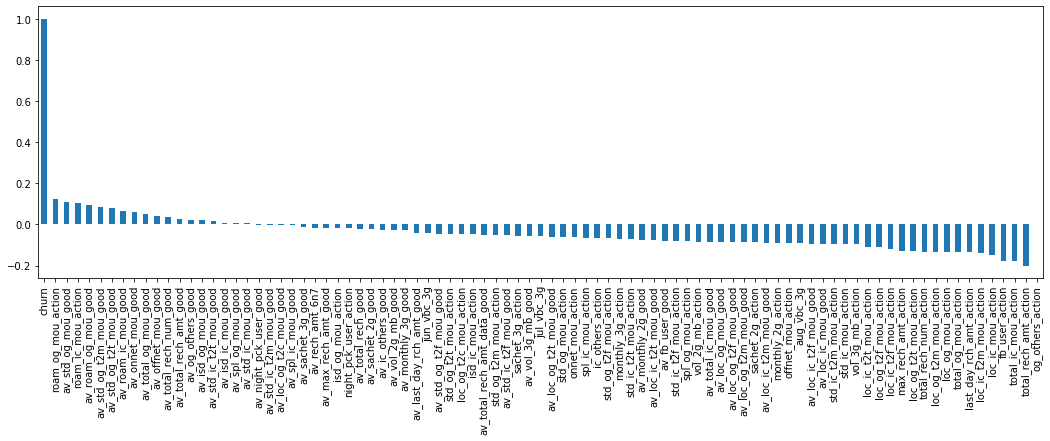

In [111]:
#Set the plot size
plt.figure(figsize=(18,5))

#View the bar plot to analyse correlation of churn with independnet variables
cleaned_data_df.corr()['churn'].sort_values(ascending = False).plot(kind='bar')

From the correlation bar plot we make following observations:

- The **roaming calls (incomming & outgoing)** for **action phase** have **positive correlation** with customer churn.
- The **std outgoing** calls for **good phase** have **positive correlation** with customer churn.


- The **total recharge amount** for **action phase** has **negative correlation** with customer churn.
- The **local calls (incoming & outgoing)** for **action phase** have **negative correlation** with customer churn.

Lets quantify the multicollinearity within independent variables using a heat map.

In [112]:
#Check which columns are quantitative, qualitative and datetime
all_variables = cleaned_data_df.columns

#Identify columns available as quantitative
quantitative_variables = list(cleaned_data_df.select_dtypes(include=[np.number]).columns.values)

#Identify columns available as qualitative
qualitative_variables = list(cleaned_data_df.select_dtypes(include=[np.object]).columns.values)

#Identify columns available as datetime
date_variables = list(set(all_variables) - set(quantitative_variables) - set(qualitative_variables))

#View the dtypes result
print('Total variables available in customer_info_df are: ', len(all_variables))
print('Total quantitative variables are: ', len(quantitative_variables))

Total variables available in customer_info_df are:  92
Total quantitative variables are:  89


Considering we have high number of quantitative variables. We will first create a list of highly correlated variables and then visualise them using a heatmap for there corresponding correlations.

In [113]:
#Create correlation matrix using absolute values
correlation_matrix = cleaned_data_df[quantitative_variables].corr().abs()

#Select upper triangle of correlation matrix
upper_matrix = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))

#Find the variables with correlation greater than 0.80
correlated_variables = [column for column in upper_matrix.columns if any(upper_matrix[column] > 0.75)]

#Check the list of correlated variables
correlated_variables

['roam_og_mou_action',
 'loc_og_mou_action',
 'std_og_t2t_mou_action',
 'std_og_t2m_mou_action',
 'std_og_mou_action',
 'total_og_mou_action',
 'loc_ic_mou_action',
 'std_ic_mou_action',
 'total_ic_mou_action',
 'av_onnet_mou_good',
 'av_offnet_mou_good',
 'av_roam_og_mou_good',
 'av_loc_og_t2t_mou_good',
 'av_loc_og_t2m_mou_good',
 'av_loc_og_t2f_mou_good',
 'av_loc_og_mou_good',
 'av_std_og_t2t_mou_good',
 'av_std_og_t2m_mou_good',
 'av_std_og_mou_good',
 'av_total_og_mou_good',
 'av_loc_ic_t2t_mou_good',
 'av_loc_ic_t2m_mou_good',
 'av_loc_ic_t2f_mou_good',
 'av_loc_ic_mou_good',
 'av_std_ic_mou_good',
 'av_total_ic_mou_good',
 'av_total_rech_amt_data_good',
 'av_total_rech_good']

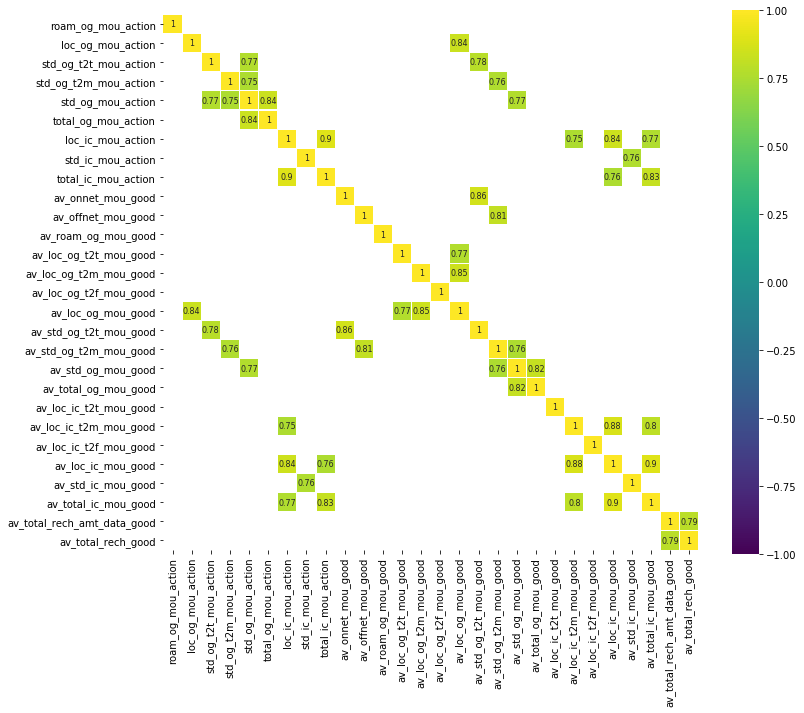

In [114]:
#Create a correlation matrix for heatmap of the significant correlations within independnet variables
corr = cleaned_data_df[correlated_variables].corr() # We already examined HousePrice correlations

#Set plot size
plt.figure(figsize=(12, 10))

#View heat map with cutoff of 0.75
sns.heatmap(corr[(corr >= 0.75) | (corr <= -0.75)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True)

Some of the key observations from visualizing correlated variables is as follows:

- Following variables seem to have **good positive correlation**
    - av_loc_og_mou_good  <=> loc_og_mou_action
    - av_loc_og_t2m_mou_good  <=> loc_og_mou_action
    - av_std_og_t2t_mou_good  <=> std_og_t2t_mou_action
    - av_std_og_t2m_mou_good  <=> std_og_t2m_mou_action
    - av_total_og_mou_good  <=> total_og_mou_action
    - av_loc_ic_t2m_mou_good  <=> loc_ic_mou_action
    - av_loc_ic_mou_good  <=> loc_ic_mou_action
    - av_total_ic_mou_good  <=> loc_ic_mou_action
    - av_std_ic_mou_good  <=> std_ic_mou_action
    - av_loc_ic_mou_good  <=> total_ic_mou_action
    - av_total_ic_mou_good  <=> total_ic_mou_action
    - av_loc_ic_mou_good  <=> av_loc_ic_t2m_mou_action
    - av_total_ic_mou_good  <=> av_loc_ic_t2m_mou_action
    - av_total_ic_mou_good  <=> av_loc_ic_mou_action

These combinations would lead to multicollinearity issue and would be handled during modeling.

Let's explore the association of arpu_change and aon_months_group with churn.

Create two user defined functions for a bar graph and 100% stacked bar graph.

In [115]:
def plot1_variable (variable_df,analysis_variable, sz):
    
    #Create a cross tab from variable_df for given variable of interest
    crosstab_df = pd.crosstab(variable_df[analysis_variable], variable_df['churn'],margins=True)

    #Remove the totals row at end
    crosstab_df = crosstab_df[0:-1]
    
    #Add a bar plot of number of applicants
    bar_plot_df =  crosstab_df.iloc[:,0:2]
    bar_plot = bar_plot_df.plot(kind='bar',rot=1, figsize=sz,stacked = True, color = ['#a2aeb3','#5dc4f0'], grid =False)
    bar_plot.set_ylabel('Number of Customers Churned',color = '#5dc4f0',fontsize=15)
    sub_plot1 = bar_plot

def plot2_variable (variable_df,analysis_variable,sz):

    #Create a cross tab from variable_df for given variable of interest
    pal = ["royalblue", "dodgerblue"]
    crosstab_df  = pd.crosstab(variable_df[analysis_variable], variable_df['churn']).apply(lambda r: r/r.sum()*100, axis=1)
    
    #Add 100% stacked bar plot
    bar_plot_df =  crosstab_df.iloc[:,0:2]
    bar_plot = bar_plot_df.plot(kind='bar',rot=1, figsize=sz,stacked = True, color = ['#a2aeb3','#5dc4f0'], grid = False)
    bar_plot.set_ylabel('Proportion of Customers Churned',color = '#5dc4f0',fontsize=15)
    
    #Add data labels on chart
    for rec in bar_plot.patches:
        height = rec.get_height()
        bar_plot.text(rec.get_x() + rec.get_width() / 2, 
                  rec.get_y() + height / 2,
                  "{:.0f}%".format(height),
                  ha='center', 
                  va='bottom')

Explore the association of **arpu_change** with **churn**

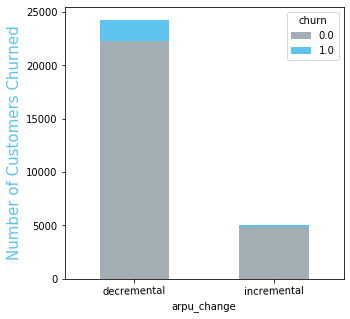

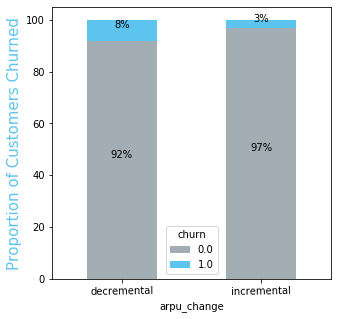

In [116]:
#Set the current analysis variable
analysis_variable = 'arpu_change'

#Create a list of columns to analyse
cols = [analysis_variable,'churn']

#Create the subset for bar plot
variable_df = cleaned_data_df[cols]

#Call the plot function
sz = (5,5)
plot1_variable(variable_df,analysis_variable,sz)
plot2_variable(variable_df,analysis_variable,sz)

Looks like apru_change doesn't have much impact on churn of high value customers.

Explore the association of **aon_months_group** with **churn**.

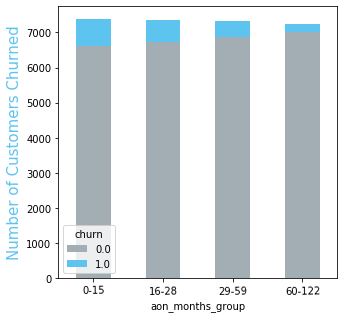

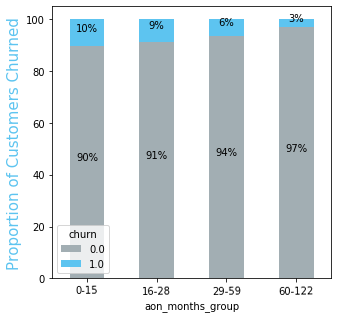

In [117]:
#Set the current analysis variable
analysis_variable = 'aon_months_group'

#Create a list of columns to analyse
cols = [analysis_variable,'churn']

#Create the subset for bar plot
variable_df = cleaned_data_df[cols]

#Call the plot function
sz = (5,5)
plot1_variable(variable_df,analysis_variable,sz)
plot2_variable(variable_df,analysis_variable,sz)

We can clearly see a decreasing churn trend as the tenure of the customer increases with the telecom operator.

#### <font color = Blue> **Step 10: Data preparation for modeling**</font>

In [118]:
#Create a modeling_df from cleaned_data_df for modelling exercise
modeling_df = cleaned_data_df.copy()

#### Create dummy variables

In [119]:
#User defined function to create dummy variavles for a given independent variable
def create_dummy_variables(modeling_df, predictor_variable):
    
    #Create dummy variable
    current_dummies = pd.get_dummies(modeling_df[predictor_variable], drop_first = True)
    
    #Concate the newly created dummy variables with modeling_df
    modeling_df = pd.concat([modeling_df, current_dummies], axis = 1)
        
    return(modeling_df)

In [120]:
#Create dummies for arpu_change variable
modeling_df = create_dummy_variables(modeling_df = modeling_df, predictor_variable = 'arpu_change')

#Create dummies for aon_months_group variable
modeling_df = create_dummy_variables(modeling_df = modeling_df, predictor_variable = 'aon_months_group')

In [121]:
#Check number of rows and columns in the modeling_df
print('There are',modeling_df.shape[0],'records and',modeling_df.shape[1],'variables in the data available for modeling.')

There are 29309 records and 96 variables in the data available for modeling.


Drop the original qualitative variables since we have dummies created for them. Also drop the unwanted date column 'date_of_last_rech_action' 

In [122]:
#Drop the original qualitative independnet variable for whom we have dummies now
modeling_df.drop(['arpu_change','aon_months_group','date_of_last_rech_action'], axis = 1, inplace = True)

In [123]:
#Check number of rows and columns in the modeling_df
print('There are',modeling_df.shape[0],'records and',modeling_df.shape[1],'variables in the data available for modeling.')

There are 29309 records and 93 variables in the data available for modeling.


Check any variable need to be dropped.

In [124]:
#Count the number of unique values in each variable of modeling_df
unique_values_df = pd.DataFrame(modeling_df.nunique())

#Pull the variable names from index as a seperate column
unique_values_df.reset_index(inplace=True)

#Rename the count column and variable names columns in the unique_values_df
unique_values_df = unique_values_df.rename(columns = {0: "unique_value_count",
                                                        "index": "variable"})

#Sort the unique_values_df
unique_values_df.sort_values(["unique_value_count", "variable"], axis=0, ascending=True, inplace=True)

#View the variables with just 1 levels in unique_values_df i.e. no variation variable.
unique_values_df[unique_values_df['unique_value_count']==1]

,variable,unique_value_count
15,og_others_action,1


In [125]:
#Drop the no variance column
modeling_df.drop('og_others_action', axis=1, inplace=True)

In [126]:
#Save modeling_df for back up
modeling_df.to_csv('modeling_df.csv')

#### <font color = Blue> **Step 11: Modelling**</font>

We will build following 2 models to address the business problem at hand.

1. An Interpretable Model: - This model will serve the purpose of identifying significant variables impacting high value customer churn.
    - Logistic Regression learner to be used to identify impactful vaariables


2. Churn Prediction Model: - This model will focus on classification performance using dimensionality reduction technique to correctly predict high value customer churn.
    - Model#2.a - Random Forest
    - Model#2.b - KNN - K Nearest Neighbours
    - Model#2.c - Ridge Classifier
    

We will **handle class imbalance** and **perform data scaling** whilst creating the aforementioned models.

#### Model #1: Interpretable Model - Logistic Regression Model

#### Create train & test split

As the first basic step for classification we will perform a **train-test split** of the available data. **80%** of the data would be utilised for training and **20%** would be reserved for testing the model accuracy.

In [127]:
#Create train and test splits
X = modeling_df.loc[:, modeling_df.columns != 'churn']
y = modeling_df.loc[:, modeling_df.columns == 'churn']
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8,test_size=0.2, random_state=123)

Shape of X: (29309, 91)
Shape of y: (29309, 1)


In [128]:
#Check if the train and test is proportionally balanced w.r.t churn 
print('Proportion of churn customers in train data',round(len(y_train[y_train['churn']==1])/len(y_train) * 100,2),'%')
print('Proportion of churn customers in test data',round(len(y_test[y_test['churn']==1])/len(y_test) * 100,2),'%')

Proportion of churn customers in train data 7.08 %
Proportion of churn customers in test data 7.28 %


The split of churned customers is proportionate between train and test sets.

#### Handle class imbalance in training data using SMOTE

In [129]:
#We can check the numbers of our train data before oversamling minority class
print("Total records in training data is",len(X_train),'\n')
print("Number of no churn records in training data is",len(y_train[y_train['churn']==0]),'\n')
print("Number of churn records in training data is",len(y_train[y_train['churn']==1]),'\n')
print("Proportion of no churn records in training data is",round((len(y_train[y_train['churn']==0])/len(y_train))*100,2),'%\n')
print("Proportion of churn records in training data is",round((len(y_train[y_train['churn']==1])/len(y_train))*100,2),'%\n')

Total records in training data is 23447 

Number of no churn records in training data is 21787 

Number of churn records in training data is 1660 

Proportion of no churn records in training data is 92.92 %

Proportion of churn records in training data is 7.08 %



In [130]:
#Create a list of traning variables
traning_variables = X_train.columns

#Set the SMOTE instance
os = SMOTE(random_state=0)

#Apply SMOTE on traning data
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=traning_variables)
os_data_y= pd.DataFrame(data=os_data_y,columns=['churn'])

In [131]:
#We can check the numbers of our train data before oversamling minority class
print("Total records in training data is",len(os_data_X),'\n')
print("Number of no churn records in training data is",len(os_data_y[os_data_y['churn']==0]),'\n')
print("Number of churn records in training data is",len(os_data_y[os_data_y['churn']==0]),'\n')
print("Proportion of no churn records in training data is",len(os_data_y[os_data_y['churn']==0])/len(os_data_X)*100,'%\n')
print("Proportion of churn records in training data is",len(os_data_y[os_data_y['churn']==1])/len(os_data_X)*100,'%\n')

Total records in training data is 43574 

Number of no churn records in training data is 21787 

Number of churn records in training data is 21787 

Proportion of no churn records in training data is 50.0 %

Proportion of churn records in training data is 50.0 %



Thus, we have **oversampled just the minority class** to train the classifier in order **to learn the characteristics of the churned customers** as well.

#### Check the quantitative variables in train data to be scaled before feeding them to model.

In [132]:
#Check which columns are quantitative and which columns are qualitative
all_variables = os_data_X.columns

#Identify columns avilable as quantitative
quantitative_variables = list(os_data_X.select_dtypes(include=[np.number]).columns.values)

#Identify columns available as qualitative
qualitative_variables = list(set(all_variables) - set(quantitative_variables))

print('Total variables available in modeling_df are: ', len(all_variables))
print('Total quantitative variables are: ', len(quantitative_variables))
print('Total qualitative variables are: ', len(qualitative_variables))

Total variables available in modeling_df are:  91
Total quantitative variables are:  91
Total qualitative variables are:  0


#### Rescale the variables in train data to have comparable scale

We will make use of StandardScaler to standardise the numerical variables.

In [133]:
#Create a list of all independent variables
variable_list = os_data_X.columns

In [134]:
#Check the max and min value across all independnet variables
max_value = pd.DataFrame((os_data_X[variable_list].max()))
min_value = pd.DataFrame((os_data_X[variable_list].min()))

#Check the unique max value across all independent variables
print('The max value across all columns is',max_value[0].unique()[0])
print('The min value across all columns is',min_value[0].unique()[0])

The max value across all columns is 2165.2963999999993
The min value across all columns is 0.0


Exclude the discrete quantitative variables with just two levels (0 and 1) and retain only continuous quantitative variables for scaling.

In [135]:
#Count the number of unique values in each variable of os_data_X
unique_values_df = pd.DataFrame(os_data_X.nunique())

#Pull the variable names from index as a seperate column
unique_values_df.reset_index(inplace=True)

#Rename the count column and variable names columns in the unique_values_df
unique_values_df = unique_values_df.rename(columns = {0: "unique_value_count",
                                                        "index": "variable"})

#Sort the unique_values_df
unique_values_df.sort_values(["unique_value_count", "variable"], axis=0, ascending=True, inplace=True)

#View the variables with just 2 levels in unique_values_df
unique_values_df[unique_values_df['unique_value_count']==2]

,variable,unique_value_count
88,16-28,2
89,29-59,2
90,60-122,2
87,incremental,2


In [136]:
#Update the variable_list for continuous quantitative variables
variable_list_df = unique_values_df[unique_values_df['unique_value_count']>2]
variable_list = list(variable_list_df['variable'])
print('Following are the variables to scale for modelling: ','\n',variable_list)

Following are the variables to scale for modelling:  
 ['night_pck_user_action', 'spl_ic_mou_action', 'monthly_2g_action', 'av_night_pck_user_good', 'sachet_3g_action', 'monthly_3g_action', 'isd_og_mou_action', 'std_og_t2f_mou_action', 'fb_user_action', 'std_ic_t2f_mou_action', 'av_monthly_2g_good', 'ic_others_action', 'av_monthly_3g_good', 'sachet_2g_action', 'av_sachet_3g_good', 'av_isd_og_mou_good', 'isd_ic_mou_action', 'av_std_og_t2f_mou_good', 'loc_og_t2c_mou_action', 'av_fb_user_good', 'av_spl_ic_mou_good', 'av_og_others_good', 'av_sachet_2g_good', 'last_day_rch_amt_action', 'av_std_ic_t2f_mou_good', 'loc_og_t2f_mou_action', 'vol_3g_mb_action', 'av_ic_others_good', 'aug_vbc_3g', 'av_isd_ic_mou_good', 'vol_2g_mb_action', 'loc_ic_t2f_mou_action', 'spl_og_mou_action', 'max_rech_amt_action', 'std_ic_t2t_mou_action', 'jun_vbc_3g', 'roam_ic_mou_action', 'jul_vbc_3g', 'roam_og_mou_action', 'av_total_rech_amt_data_good', 'av_loc_og_t2c_mou_good', 'total_rech_amt_action', 'av_roam_ic_mou_

In [137]:
#Set the scaler
scaler = StandardScaler()

#Apply the scaler and standardise the numeric variables in variable_list
os_data_X[variable_list] = scaler.fit_transform(os_data_X[variable_list])

#Check the scaled training data
os_data_X.head()

,onnet_mou_action,offnet_mou_action,roam_ic_mou_action,roam_og_mou_action,loc_og_t2t_mou_action,loc_og_t2m_mou_action,loc_og_t2f_mou_action,loc_og_t2c_mou_action,loc_og_mou_action,std_og_t2t_mou_action,...,av_sachet_2g_good,av_monthly_3g_good,av_sachet_3g_good,av_fb_user_good,av_total_rech_amt_data_good,av_total_rech_good,incremental,16-28,29-59,60-122
0,-0.013905,-0.344751,-0.453787,-0.484677,2.107706,0.223481,-0.421379,-0.390662,0.631612,-0.372583,...,0.462659,-0.415075,1.645187,0.108806,0.208936,0.065135,0,0,0,1
1,-0.528645,-0.749568,-0.453787,-0.484677,-0.602334,-0.632278,-0.421379,-0.390662,-0.647231,-0.372583,...,-0.495905,-0.415075,-0.421630,1.236987,0.118622,-0.505469,0,0,1,0
2,0.525275,-0.117608,-0.453787,-0.484677,-0.230083,-0.215520,0.322517,0.241276,-0.257068,0.751584,...,2.140147,-0.415075,-0.421630,1.236987,1.763333,1.098411,0,1,0,0
3,-0.462544,-0.168719,-0.453787,-0.484677,-0.351124,0.594720,-0.250077,-0.390662,0.226927,-0.351593,...,-0.495905,-0.415075,1.645187,0.108806,-0.562743,-0.694711,0,0,0,1
4,-0.526656,-0.708178,-0.453787,-0.484677,-0.591861,-0.611488,-0.421379,-0.390662,-0.630846,-0.372583,...,-0.495905,1.820760,-0.421630,1.236987,-0.148304,-0.681039,1,0,0,0


In [138]:
#Create a backup of os_data_X, os_data_y, y_test and X_test for PCA later on
X_train_pca = os_data_X
y_train_pca = os_data_y
X_test_pca = X_test
y_test_pca = y_test

#### Feature reduction using RFE

Now, since we have too many independent variables to consider and find the most significant ones for modelling. We will implement RFE - **Recursive Feature Elimination** first to get the subset of prominent predictors.

We will consider top **10 prominent features** from RFE.

In [188]:
#Setup logistic regression for RFE with the desired number of features to be selected
number_of_features = 10
lr = LogisticRegression()
lr.fit(os_data_X, os_data_y)

#Running RFE
rfe = RFE(lr, number_of_features)       
rfe = rfe.fit(os_data_X, os_data_y)

In [189]:
#Check the prominent fetures identified
prominent_features = os_data_X.columns[rfe.support_]
prominent_features

Index(['loc_og_mou_action', 'std_og_t2t_mou_action', 'std_og_t2m_mou_action',
       'std_og_mou_action', 'total_og_mou_action', 'fb_user_action',
       'incremental', '16-28', '29-59', '60-122'],
      dtype='object')

The set of **10 prominent features** has some of the important actionable variables from domain perspective. So we will proceed with these to build our logistic regression model for classification.

In [190]:
#Create a list of prominent features
prominent_features = prominent_features.to_list()

In [191]:
#Update the train data with only prominent_features
X_train_rfe = os_data_X[prominent_features]

#Check the structure of updated training data
X_train_rfe.shape

(43574, 10)

Check correlation between the prominent 10 variables before building the model.

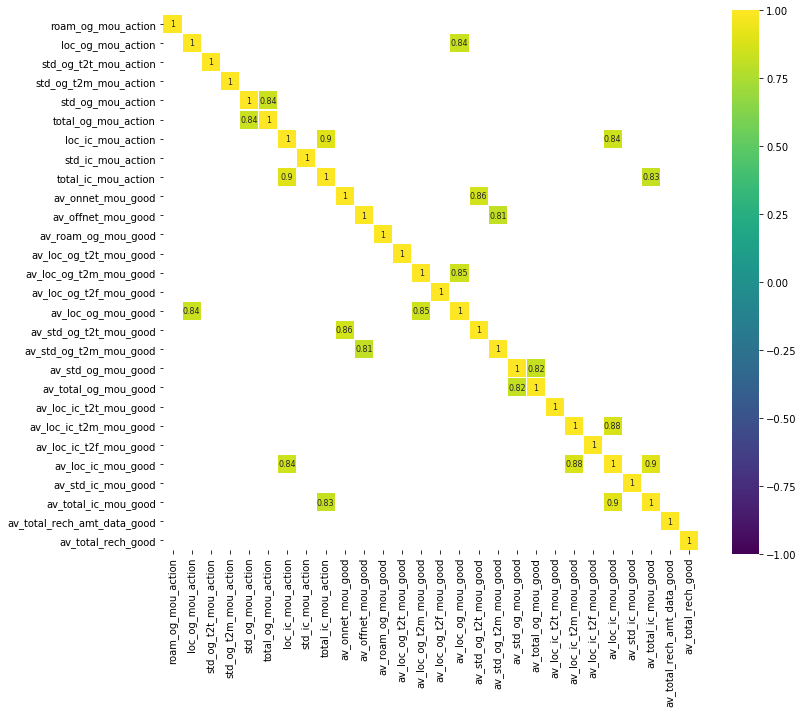

In [400]:
#Create a correlation matrix for heatmap of the significant correlations within independnet variables
correlation_matrix = X_train_rfe[prominent_features].corr()

#Set plot size
plt.figure(figsize=(12,10))

#View heat map with cutoff of 0.8
sns.heatmap(corr[(corr >= 0.8) | (corr <= -0.8)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True)

plt.show()

Following are some of the variable combinations with **strong correlation** which migh lead to **multicollinearity** in the model.

- av_loc_og_mou_good <-> loc_og_mou_action
- total_og_mou_action <-> std_og_mou_action
- total_ic_mou_action <-> loc_ic_mou_action
- av_loc_ic_mou_good <-> loc_ic_mou_action
- av_total_ic_mou_good <-> total_ic_mou_action
- av_std_og_t2t_mou_good <-> av_onnet_mou_good
- av_std_og_t2m_mou_good <-> av_offnet_mou_good
- av_loc_og_mou_good <-> av_loc_og_t2m_mou_good
- av_total_og_mou_good <-> av_std_og_mou_good
- av_loc_ic_mou_good <-> av_loc_ic_t2m_mou_good
- av_total_ic_mou_good <-> av_loc_ic_mou_good

#### Logistic Regression

We will now build the interpretable model to understand the significant features with following approach:

1. Build a logistic regression model (sklearn) using promiment features to find optimal hyper-parameters
2. Re-build the model with optimal hyper-parameters and check multicollinearity.
3. If multicollinearity exists treat it and repeat steps 1 & 2.
4. Derive relative feature importance to understand impactful features.
5. Check final model performance.

We will use grid serach methos to find optimal hyper-parameters for Logistic Rgression model.

In [192]:
#Retain only prominent features in os_data_X to build the model
os_data_X  = os_data_X[prominent_features]

#Check the shape of updated os_data_X
os_data_X.shape

(43574, 10)

In [402]:
#Define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

#Define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(os_data_X, os_data_y)

#Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.845451 using {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.844808 (0.003999) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.844808 (0.003999) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.844839 (0.003997) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.844839 (0.004002) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.844839 (0.004002) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.844839 (0.003991) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.845443 (0.004154) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.845435 (0.004154) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.845451 (0.004144) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.842636 (0.004231) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.842628 (0.004222) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.842689 (0.004266) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.833639 (0.004757) wit

#### Building the Logistic Regression model with optimal hyper-parameters

In [193]:
#Define the logistic regression model and hyper-parameters
logreg = LogisticRegression(C=1.0, penalty='l2',solver='liblinear', verbose=1)

#Fit the logistic regression model
logreg.fit(os_data_X, os_data_y)

[LibLinear]

LogisticRegression(solver='liblinear', verbose=1)

#### Define a function to compute model performance metrics

In [194]:
def compute_performance_metrics(y_test, y_pred):
    
    return_list = []
    
    #Create a confusion matrix
    confusion_matrix = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred))

    #Set the index and column names of the matrix
    confusion_matrix.index = ['actual(0)', 'actual(1)']
    confusion_matrix.columns = ['predicted(0)','predicted(1)']
    return_list.append(confusion_matrix)
    
    #Check the accuracy of the model
    accuracy = metrics.accuracy_score(y_test, y_pred)
    accuracy_percentage = 100 * accuracy
    return_list.append(accuracy_percentage)
    
    #Compute Sensitivity, Specificity, FPR, TPR, Precision and Recall
    TP = confusion_matrix.iloc[1,1] # true positive 
    TN = confusion_matrix.iloc[0,0] # true negatives
    FP = confusion_matrix.iloc[0,1] # false positives
    FN = confusion_matrix.iloc[1,0] # false negatives
    
    #Compute the sensitivity of classification model
    sensitivity = (TP/float(TP+FN))
    
    #Compute the specificity of classification model
    specificity = (TN/float(TN+FP))
    
    #Calculate false postive rate - predicting churn when customer does not have churned
    fpr = (FP/float(TN+FP))
    
    #Positive predictive value 
    ppv = (TP/float(TP+FP))
    
    #Negative predictive value
    npv = (TN/float(TN+ FN))
    
    #Create prediction dataframe
    y_pred = pd.DataFrame(y_pred)

    #Create a dataframe with actual values and fitted/predicted probabilty
    y_pred_final = pd.concat([y_test.reset_index(drop=True), y_pred], axis=1)
    y_pred_final.columns = ['churn','churn_prob']

    #Recall
    recall = recall_score(y_pred_final.churn, y_pred_final.churn_prob)
    
    #Precision
    precision = precision_score(y_pred_final.churn, y_pred_final.churn_prob)

    return_list.append(sensitivity)
    return_list.append(specificity)
    return_list.append(fpr)
    return_list.append(ppv)
    return_list.append(npv)
    return_list.append(recall)
    return_list.append(precision)
    
    return(return_list)

#### Define a function to compute vif values

In [195]:
def compute_vif(vif_train_df):
    #Remove constant variable
    #vif_train_df = vif_train_df.drop(['const'], axis=1)

    #Create a data frame to store vif result
    vif_df = pd.DataFrame()

    #Set the features as the variables in vif_train_df
    X = vif_train_df
    vif_df['features'] = X.columns

    #Compute VIF value for each variable
    vif_df['vif'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    #Round of vif values
    vif_df['vif'] = round(vif_df['vif'], 2)

    #Sort the vif values
    vif_df = vif_df.sort_values(by = "vif", ascending = False)

    #Return vif_df 
    return vif_df


In [196]:
#Compute vif values to find correlated variables
vif_df = compute_vif(vif_train_df = os_data_X)

#Check variables with multicollinearity problem
vif_df[vif_df['vif']>=5]

,features,vif
3,std_og_mou_action,102.83
4,total_og_mou_action,55.99
1,std_og_t2t_mou_action,28.21
2,std_og_t2m_mou_action,25.02
0,loc_og_mou_action,13.23


In [197]:
#Create a dataframe to understand the impact of the variables for interpretation
feature_impact_df = pd.DataFrame(os_data_X.columns, list(logreg.coef_))

#Pull the variable names from index as a seperate column
feature_impact_df.reset_index(inplace=True)

#Rename the count column and variable names columns in the feature_impact_df
feature_impact_df = feature_impact_df.rename(columns = {0: "features",
                                                        "level_0": "coef_value"})

#Sort the feature_impact_df
feature_impact_df.sort_values(["coef_value", "features"], axis=0, ascending=False, inplace=True)

#Merge the VIF information along with variable importance
feature_impact_df = feature_impact_df.merge(vif_df, on='features', how='left', indicator=False)

#Re-order columns
feature_impact_df = feature_impact_df[["features", "coef_value", "vif"]]

#View feature_impact_df
feature_impact_df

,features,coef_value,vif
0,std_og_mou_action,7.651891,102.83
1,loc_og_mou_action,1.982321,13.23
2,fb_user_action,-0.969627,1.09
3,std_og_t2m_mou_action,-1.467341,25.02
4,std_og_t2t_mou_action,-1.503917,28.21
5,16-28,-1.935183,1.04
6,incremental,-1.965942,1.15
7,29-59,-2.323442,1.05
8,60-122,-2.872402,1.13
9,total_og_mou_action,-6.837146,55.99


Out of the 10 independent variables fed into the model, **5** variables have shown high vif value i.e. **vif>=5**. 

We will now use following rule of thumb to retain/drop independent variables and rebuild model until we arrive at an optimal model.

1. Low p-Value & Low VIF - Retain
2. High p-Value & High VIF - Drop
3. High p-Value & Low VIF - Remove first before step 4
4. Low p-Value & High VIF - Remove after step 3 & rerun model as these might change after step 3.

Drop **std_og_mou_action** variable with VIF 102.83 & re-compute optimal hyper-parameters.

In [198]:
#Drop std_og_mou_action variable
os_data_X = os_data_X.drop('std_og_mou_action', 1,)

#Check updated shape of os_data_X
os_data_X.shape

(43574, 9)

In [409]:
#Re-compute optimal hyper-parameters on updated os_data_X
grid_result = grid_search.fit(os_data_X, os_data_y)

#Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.834894 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.834894 (0.004648) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.834894 (0.004648) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.834879 (0.004667) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.834856 (0.004669) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.834856 (0.004669) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.834863 (0.004668) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.834741 (0.004656) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.834756 (0.004645) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.834733 (0.004664) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.834129 (0.004482) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.834137 (0.004483) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.834121 (0.004512) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.831773 (0.005103) wit

In [199]:
#Re-Define the logistic regression model on optimal hyper-parameters
logreg = LogisticRegression(C=100, penalty='l2',solver='newton-cg', verbose=1)

#Fit the logistic regression model
logreg.fit(os_data_X, os_data_y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished


LogisticRegression(C=100, solver='newton-cg', verbose=1)

In [200]:
#Compute vif values to find correlated variables
vif_df = compute_vif(vif_train_df = os_data_X)

#Check variables with multicollinearity problem
vif_df[vif_df['vif']>=5]

,features,vif
3,total_og_mou_action,33.46
1,std_og_t2t_mou_action,12.26
2,std_og_t2m_mou_action,10.83
0,loc_og_mou_action,8.36


In [201]:
#Create a dataframe to understand the impact of the variables for interpretation
feature_impact_df = pd.DataFrame(os_data_X.columns, list(logreg.coef_))

#Pull the variable names from index as a seperate column
feature_impact_df.reset_index(inplace=True)

#Rename the count column and variable names columns in the feature_impact_df
feature_impact_df = feature_impact_df.rename(columns = {0: "features",
                                                        "level_0": "coef_value"})

#Sort the feature_impact_df
feature_impact_df.sort_values(["coef_value", "features"], axis=0, ascending=False, inplace=True)

#Merge the VIF information along with variable importance
feature_impact_df = feature_impact_df.merge(vif_df, on='features', how='left', indicator=False)

#Re-order columns
feature_impact_df = feature_impact_df[["features", "coef_value", "vif"]]

#View feature_impact_df
feature_impact_df

,features,coef_value,vif
0,std_og_t2t_mou_action,0.684948,12.26
1,std_og_t2m_mou_action,0.590584,10.83
2,loc_og_mou_action,-0.171953,8.36
3,fb_user_action,-0.980891,1.09
4,total_og_mou_action,-1.772892,33.46
5,16-28,-1.971595,1.04
6,incremental,-2.004786,1.15
7,29-59,-2.404964,1.05
8,60-122,-2.981154,1.13


Drop **std_og_t2t_mou_action** variable with VIF 12.26 & re-compute optimal hyper-parameters.

In [202]:
#Drop std_og_t2t_mou_action variable
os_data_X = os_data_X.drop('std_og_t2t_mou_action', 1,)

#Check updated shape of os_data_X
os_data_X.shape

(43574, 8)

In [414]:
#Re-compute optimal hyper-parameters on updated os_data_X
grid_result = grid_search.fit(os_data_X, os_data_y)

#Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.832584 using {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.830495 (0.005371) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.830495 (0.005384) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.830480 (0.005370) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.830488 (0.005387) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.830488 (0.005387) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.830488 (0.005369) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.830472 (0.005384) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.830472 (0.005384) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.830480 (0.005377) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.832515 (0.005021) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.832515 (0.005021) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.832584 (0.005010) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.831138 (0.004918) wit

In [203]:
#Re-Define the logistic regression model on optimal hyper-parameters
logreg = LogisticRegression(C=0.1, penalty='l2',solver='liblinear', verbose=1)

#Fit the logistic regression model
logreg.fit(os_data_X, os_data_y)

[LibLinear]

LogisticRegression(C=0.1, solver='liblinear', verbose=1)

In [204]:
#Compute vif values to find correlated variables
vif_df = compute_vif(vif_train_df = os_data_X)

#Check variables with multicollinearity problem
vif_df[vif_df['vif']>=5]

,features,vif


In [205]:
#Create a dataframe to understand the impact of the variables for interpretation
feature_impact_df = pd.DataFrame(os_data_X.columns, list(logreg.coef_))

#Pull the variable names from index as a seperate column
feature_impact_df.reset_index(inplace=True)

#Rename the count column and variable names columns in the feature_impact_df
feature_impact_df = feature_impact_df.rename(columns = {0: "features",
                                                        "level_0": "coef_value"})

#Sort the feature_impact_df
feature_impact_df.sort_values(["coef_value", "features"], axis=0, ascending=False, inplace=True)

#Merge the VIF information along with variable importance
feature_impact_df = feature_impact_df.merge(vif_df, on='features', how='left', indicator=False)

#Re-order columns
feature_impact_df = feature_impact_df[["features", "coef_value", "vif"]]

#View feature_impact_df
feature_impact_df

,features,coef_value,vif
0,std_og_t2m_mou_action,-0.014730,2.19
1,total_og_mou_action,-0.621125,2.87
2,loc_og_mou_action,-0.677161,1.70
3,fb_user_action,-0.992760,1.07
4,16-28,-1.923053,1.04
5,incremental,-1.928082,1.15
6,29-59,-2.362843,1.05
7,60-122,-2.926040,1.13


Now, the multicollinearity issue has been addressed and we can consider this model as out final interpretable model.


We will now proceed to make predictions on test data and analyse goodness of fit on unseen data.

Apply scaling on test data and make predictions.


In [206]:
#Apply scaling transformation on test data
X_test[variable_list] = scaler.transform(X_test[variable_list])

#View test data
X_test.head()

,onnet_mou_action,offnet_mou_action,roam_ic_mou_action,roam_og_mou_action,loc_og_t2t_mou_action,loc_og_t2m_mou_action,loc_og_t2f_mou_action,loc_og_t2c_mou_action,loc_og_mou_action,std_og_t2t_mou_action,...,av_sachet_2g_good,av_monthly_3g_good,av_sachet_3g_good,av_fb_user_good,av_total_rech_amt_data_good,av_total_rech_good,incremental,16-28,29-59,60-122
19585,-0.481016,0.218300,-0.453787,-0.484677,-0.351573,1.297741,0.114734,-0.294497,0.696084,-0.372583,...,-0.016623,-0.415075,3.712005,1.236987,-0.138269,-0.287445,0,1,0,0
54235,-0.411619,-0.094992,-0.453787,-0.484677,0.013795,0.789886,-0.380140,-0.344869,0.448155,-0.372583,...,-0.495905,6.292430,-0.421630,1.236987,3.858609,5.798724,0,0,1,0
42480,1.820068,0.164822,-0.453787,-0.484677,2.460506,1.196279,-0.421379,-0.276180,1.361949,1.647655,...,-0.256264,-0.415075,-0.421630,0.108806,-0.640012,-0.448624,0,0,0,0
29832,-0.366917,3.208250,-0.453787,-0.484677,0.249145,5.963428,4.107349,1.001432,5.138886,-0.372583,...,-0.495905,-0.415075,-0.421630,-1.019376,-0.654060,-0.486761,0,0,0,0
65246,-0.528645,-0.744415,-0.453787,-0.484677,-0.602334,-0.632278,-0.421379,0.456501,-0.647231,-0.372583,...,0.941941,-0.415075,-0.421630,1.236987,0.429703,-0.469491,1,1,0,0


In [207]:
#Retain only relevant features in test data
X_test = X_test[os_data_X.columns]

#Check the revised shape of test data
X_test.shape

(5862, 8)

In [208]:
#Make predictions on test data
y_pred = logreg.predict(X_test)

Check model performance.

In [209]:
#Call function to compute performance
performance_metrics = compute_performance_metrics(y_test, y_pred)

#View confusion metrics
print('Model confusion_matrix is')
performance_metrics[0]

Model confusion_matrix is


,predicted(0),predicted(1)
actual(0),4390,1045
actual(1),138,289


In [210]:
print('Model accuracy is:', round(performance_metrics[1],2),'%')
print('Model sensitivity is:', round(performance_metrics[2]*100,2),'%')
print('Model sepcificity is:', round(performance_metrics[3]*100,2),'%')
print('Model fpr is:', round(performance_metrics[4]*100,2),'%')
print('Model ppv is:', round(performance_metrics[5]*100,2),'%')
print('Model npv is:', round(performance_metrics[6]*100,2),'%')
print('Model recall is:', round(performance_metrics[7]*100,2),'%')
print('Model precision is:', round(performance_metrics[8]*100,2),'%')

Model accuracy is: 79.82 %
Model sensitivity is: 67.68 %
Model sepcificity is: 80.77 %
Model fpr is: 19.23 %
Model ppv is: 21.66 %
Model npv is: 96.95 %
Model recall is: 67.68 %
Model precision is: 21.66 %


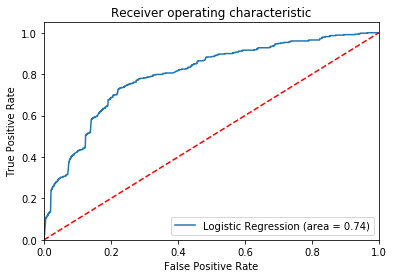

In [211]:
#Plot ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Area under the curve for the final model is 74%.

Derive the feature importance.

In [212]:
#Set the absolute coefficient values for derive feature importance.
feature_importance = abs(logreg.coef_[0])

#Compute relative importance of the features
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

array([ 23.14257852,   0.50340956,  21.22750055,  33.92846155,
        65.89392476,  65.72205246,  80.75223977, 100.        ])

In [213]:
#Create sorted array of indices of the feature as per there importance
sorted_idx = np.argsort(feature_importance)
sorted_idx

array([1, 2, 0, 3, 5, 4, 6, 7], dtype=int64)

In [214]:
#Set the position for feature importance to visualise
pos = np.arange(sorted_idx.shape[0]) + .5
pos

array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5])

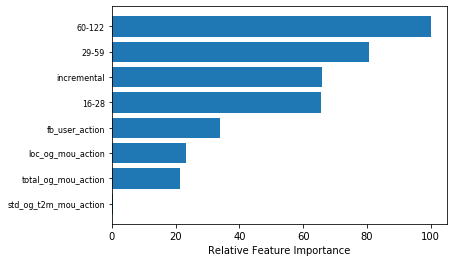

In [215]:
#Visualise the relative feature importance as per the postions set
featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_test.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')
plt.show()

In [216]:
#Create a dataframe to understand the impact of the variables for interpretation
feature_impact_df = pd.DataFrame(X_test.columns, list(logreg.coef_))

#Pull the variable names from index as a seperate column
feature_impact_df.reset_index(inplace=True)

#Rename the count column and variable names columns in the feature_impact_df
feature_impact_df = feature_impact_df.rename(columns = {0: "feature",
                                                        "level_0": "coef_value"})

#Sort the feature_impact_df
feature_impact_df.sort_values(["coef_value", "feature"], axis=0, ascending=False, inplace=True)

#View feature_impact_df
feature_impact_df = feature_impact_df[['feature','coef_value']]
feature_impact_df

,feature,coef_value
1,std_og_t2m_mou_action,-0.014730
2,total_og_mou_action,-0.621125
0,loc_og_mou_action,-0.677161
3,fb_user_action,-0.992760
5,16-28,-1.923053
4,incremental,-1.928082
6,29-59,-2.362843
7,60-122,-2.926040


Thus, we have now completed the interpretable model and following are key observations:

1. The overall accuracy of the model is 79.82 % 
2. The recall of the model is 67.68 %
3. The area under the curve of the model is 74 %
4. Total 8 significant ptedictors are used in the model.

<font color =blue> **Top driving factors as per there relative impotance that can reduce customer churn are:**</font>

1. **60-122** - Prepaid customers with tenure of <font color =blue>60 months to 122 months</font> tend to have least churn probability.
2. **29-59** -  Prepaid customers with tenure of <font color =blue>29 months to 59 months</font> tend to have lesser churn probability.
3. **incremental** - Prepaid customers with <font color =blue>incremental average revenue from good to action phase</font> tend to have lesser churn probability.
4. **16-28** - Prepaid customers with <font color =blue>tenure less than 28 months</font> tend to have higher churn probability.
5. **fb_user_action** - Prepaid customers making <font color =blue>use of fb related schemes</font> in action phase tend to have less churn probability.
6. **loc_og_mou_action** - Prepaid customers making <font color =blue>more local outgoing calls in action phase</font> tend to have less churn probability.
7. **total_og_mou_action** - Prepaid customers making <font color =blue>more outgoing calls in action phase</font> tend to have less churn probability.
8. **std_og_t2m_mou_action** - Prepaid customers making <font color =blue>more outgoing t2m calls in action phase</font> tend to have less churn probability.

#### Model #2: Performance Models

We will now focus on implementing performance models for better prediction. We will build follwing models with hyper-parameter tunning.

- 2a. Random Forest
- 2b. KNN - K nearest Neighbours
- 2c. Ridge Classifier

We will first create the principal components that will explain abount 90% of the variance in the dependent variable.

In [143]:
#Create the PCA instance with 90% explained variance setting
pca = PCA(0.9)

In [144]:
#Create the principal components
pca_train_df = pca.fit_transform(X_train_pca)

In [145]:
#Check the number of principal components created
pca_train_df.shape

(43574, 40)

Around **40 principal components** explain **90% of the variance** in the dependent variable.

#### Random Forest Classifier

Following up PCA with a **random forest model i.e. model 2a**. We will perform hyper-parameter tunning first and then build the model using principal components with optimal hyper-parameters.

Hyper-parameters set 1.

In [169]:
#Set the Random Forest classifier model using optimal hyper-parameters
randforest = RandomForestClassifier(n_estimators=100, max_features=10,max_samples = 0.7,random_state = 123)

#Fit the Random Forest model
randforest.fit(pca_train_df, y_train_pca)

RandomForestClassifier(max_features=10, max_samples=0.7, random_state=123)

In [173]:
#Create principal components for test data as well
pca_test_df = pca.transform(X_test_pca)

In [174]:
#Make predictions on test data
y_pred = randforest.predict(pca_test_df)

Check model performance.

In [175]:
#Call function to compute performance
performance_metrics = compute_performance_metrics(y_test_pca, y_pred)

#View confusion metrics
print('Model confusion_matrix is')
performance_metrics[0]

Model confusion_matrix is


,predicted(0),predicted(1)
actual(0),5386,49
actual(1),424,3


In [176]:
print('Model accuracy is:', round(performance_metrics[1],2),'%')
print('Model sensitivity is:', round(performance_metrics[2]*100,2),'%')
print('Model sepcificity is:', round(performance_metrics[3]*100,2),'%')
print('Model fpr is:', round(performance_metrics[4]*100,2),'%')
print('Model ppv is:', round(performance_metrics[5]*100,2),'%')
print('Model npv is:', round(performance_metrics[6]*100,2),'%')
print('Model recall is:', round(performance_metrics[7]*100,2),'%')
print('Model precision is:', round(performance_metrics[8]*100,2),'%')

Model accuracy is: 91.93 %
Model sensitivity is: 0.7 %
Model sepcificity is: 99.1 %
Model fpr is: 0.9 %
Model ppv is: 5.77 %
Model npv is: 92.7 %
Model recall is: 0.7 %
Model precision is: 5.77 %


Hyper-parameters set 2.

In [177]:
#Set the Random Forest classifier model using optimal hyper-parameters
randforest = RandomForestClassifier(n_estimators=500, max_features=20,max_samples = 0.7,random_state = 123)

#Fit the Random Forest model
randforest.fit(pca_train_df, y_train_pca)

RandomForestClassifier(max_features=20, max_samples=0.7, n_estimators=500,
                       random_state=123)

In [178]:
#Create principal components for test data as well
pca_test_df = pca.transform(X_test_pca)

In [179]:
#Make predictions on test data
y_pred = randforest.predict(pca_test_df)

Check model performance.

In [180]:
#Call function to compute performance
performance_metrics = compute_performance_metrics(y_test_pca, y_pred)

#View confusion metrics
print('Model confusion_matrix is')
performance_metrics[0]

Model confusion_matrix is


,predicted(0),predicted(1)
actual(0),5435,0
actual(1),427,0


In [181]:
print('Model accuracy is:', round(performance_metrics[1],2),'%')
print('Model sensitivity is:', round(performance_metrics[2]*100,2),'%')
print('Model sepcificity is:', round(performance_metrics[3]*100,2),'%')
print('Model fpr is:', round(performance_metrics[4]*100,2),'%')
print('Model ppv is:', round(performance_metrics[5]*100,2),'%')
print('Model npv is:', round(performance_metrics[6]*100,2),'%')
print('Model recall is:', round(performance_metrics[7]*100,2),'%')
print('Model precision is:', round(performance_metrics[8]*100,2),'%')

Model accuracy is: 92.72 %
Model sensitivity is: 0.0 %
Model sepcificity is: 100.0 %
Model fpr is: 0.0 %
Model ppv is: nan %
Model npv is: 92.72 %
Model recall is: 0.0 %
Model precision is: 0.0 %


Hyper-parameters set 3.

In [182]:
#Set the Random Forest classifier model using optimal hyper-parameters
randforest = RandomForestClassifier(n_estimators=1000, max_features=30,max_samples = 0.7,random_state = 123)

#Fit the Random Forest model
randforest.fit(pca_train_df, y_train_pca)

RandomForestClassifier(max_features=30, max_samples=0.7, n_estimators=1000,
                       random_state=123)

In [183]:
#Create principal components for test data as well
pca_test_df = pca.transform(X_test_pca)

In [184]:
#Make predictions on test data
y_pred = randforest.predict(pca_test_df)

Check model performance.

In [185]:
#Call function to compute performance
performance_metrics = compute_performance_metrics(y_test_pca, y_pred)

#View confusion metrics
print('Model confusion_matrix is')
performance_metrics[0]

Model confusion_matrix is


,predicted(0),predicted(1)
actual(0),5320,115
actual(1),397,30


In [186]:
print('Model accuracy is:', round(performance_metrics[1],2),'%')
print('Model sensitivity is:', round(performance_metrics[2]*100,2),'%')
print('Model sepcificity is:', round(performance_metrics[3]*100,2),'%')
print('Model fpr is:', round(performance_metrics[4]*100,2),'%')
print('Model ppv is:', round(performance_metrics[5]*100,2),'%')
print('Model npv is:', round(performance_metrics[6]*100,2),'%')
print('Model recall is:', round(performance_metrics[7]*100,2),'%')
print('Model precision is:', round(performance_metrics[8]*100,2),'%')

Model accuracy is: 91.27 %
Model sensitivity is: 7.03 %
Model sepcificity is: 97.88 %
Model fpr is: 2.12 %
Model ppv is: 20.69 %
Model npv is: 93.06 %
Model recall is: 7.03 %
Model precision is: 20.69 %


Out of the set's of hyper-parameters for Random Forest models, the 3rd set has the best performance so we will compute the AUC using ROC curve for the best random forest model we have.

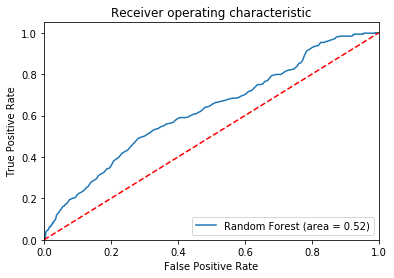

In [187]:
#Plot ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
rf_roc_auc = roc_auc_score(y_test_pca, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, randforest.predict_proba(pca_test_df)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

Area under the curve for the final model is 52%.

Model 2a - Random Forest Classifier Summary:

- Although the accuracy of the model is good, the model is more inclied towards learning non churners than churners.
- The AUC of Random Forest model is at 52 %
- Recall is around 7.03 %
- Precision is around 20.69 %

#### KNN Classifier

Next we will proceed to build another classier KNN to asses it's performance in comparison to Random Forest classifier.

Following up PCA with a **KNN model i.e. model 2b**. We will perform hyper-parameter tunning first and then build the model using principal components with optimal hyper-parameters.

In [432]:
# define models and parameters
model = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan']

#Define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

#Pass principal components and tune hyper-parameters for modeling
grid_result = grid_search.fit(pca_train_df, y_train_pca)

#Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.940431 using {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.940431 (0.003111) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.940431 (0.003111) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.916739 (0.003773) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.916900 (0.003847) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.903283 (0.003429) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.903796 (0.003373) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.895213 (0.003689) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
0.895940 (0.003682) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.888481 (0.003418) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.889644 (0.003391) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
0.883792 (

The most optimal hyper-parameters for KNN classifier are:

Best: 0.940431 using {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}

In [433]:
#Set the KNN classifier model using optimal hyper-parameters
knn = KNeighborsClassifier(n_neighbors=1, weights='uniform',metric='euclidean')

#Fit the KNN model
knn.fit(pca_train_df, y_train_pca)

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

In [434]:
#Create principal components for test data as well
pca_test_df = pca.transform(X_test_pca)

In [435]:
#Make predictions on test data
y_pred = knn.predict(pca_test_df)

Check model performance.

In [436]:
#Call function to compute performance
performance_metrics = compute_performance_metrics(y_test_pca, y_pred)

#View confusion metrics
print('Model confusion_matrix is')
performance_metrics[0]

Model confusion_matrix is


,predicted(0),predicted(1)
actual(0),4778,657
actual(1),194,233


In [437]:
print('Model accuracy is:', round(performance_metrics[1],2),'%')
print('Model sensitivity is:', round(performance_metrics[2]*100,2),'%')
print('Model sepcificity is:', round(performance_metrics[3]*100,2),'%')
print('Model fpr is:', round(performance_metrics[4]*100,2),'%')
print('Model ppv is:', round(performance_metrics[5]*100,2),'%')
print('Model npv is:', round(performance_metrics[6]*100,2),'%')
print('Model recall is:', round(performance_metrics[7]*100,2),'%')
print('Model precision is:', round(performance_metrics[8]*100,2),'%')

Model accuracy is: 85.48 %
Model sensitivity is: 54.57 %
Model sepcificity is: 87.91 %
Model fpr is: 12.09 %
Model ppv is: 26.18 %
Model npv is: 96.1 %
Model recall is: 54.57 %
Model precision is: 26.18 %


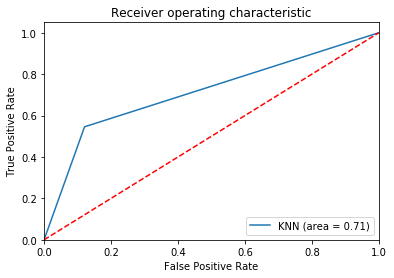

In [438]:
#Plot ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
knn_roc_auc = roc_auc_score(y_test_pca, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(pca_test_df)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

Area under the curve for the final model is 71%.

Model 2b - KNN Classifier Summary:

- Although the accuracy of the model is good, the model is more inclied towards learning non churners than churners.
- The AUC of KNN model is at 71 %
- Recall is around 54.57 %
- Precision is around 26.81 %

#### Ridge Classifier

Next we will proceed to build another classier in Ridge Classifier to asses it's performance over Random Forest & KNN classifier.

Following up PCA with a **ridge classifier model i.e. model 2c**. We will perform hyper-parameter tunning first and then build the model using principal components with optimal hyper-parameters.

In [439]:
#Define models and parameters
model = RidgeClassifier()
alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

#Define grid search
grid = dict(alpha=alpha)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

#Pass principal components and tune hyper-parameters for modeling
grid_result = grid_search.fit(pca_train_df, y_train_pca)

#Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.815754 using {'alpha': 0.1}
0.815754 (0.005906) with: {'alpha': 0.1}
0.815754 (0.005906) with: {'alpha': 0.2}
0.815754 (0.005906) with: {'alpha': 0.3}
0.815754 (0.005906) with: {'alpha': 0.4}
0.815754 (0.005906) with: {'alpha': 0.5}
0.815754 (0.005906) with: {'alpha': 0.6}
0.815754 (0.005906) with: {'alpha': 0.7}
0.815754 (0.005906) with: {'alpha': 0.8}
0.815746 (0.005911) with: {'alpha': 0.9}
0.815746 (0.005911) with: {'alpha': 1.0}


The most optimal hyper-parameters for Ridge classifier are:

Best: 0.815754 using {'alpha': 0.1}

In [440]:
#Set the Ridge classifier model using optimal hyper-parameters
ridge_clf = RidgeClassifier(alpha=0.1)

#Fit the ridge_clf model
ridge_clf.fit(pca_train_df, y_train_pca)

RidgeClassifier(alpha=0.1)

In [441]:
#Create principal components for test data as well
pca_test_df = pca.transform(X_test_pca)

In [442]:
#Make predictions on test data
y_pred = ridge_clf.predict(pca_test_df)

Check model performance.

In [443]:
#Call function to compute performance
performance_metrics = compute_performance_metrics(y_test_pca, y_pred)

#View confusion metrics
print('Model confusion_matrix is')
performance_metrics[0]

Model confusion_matrix is


,predicted(0),predicted(1)
actual(0),4299,1136
actual(1),76,351


In [444]:
print('Model accuracy is:', round(performance_metrics[1],2),'%')
print('Model sensitivity is:', round(performance_metrics[2]*100,2),'%')
print('Model sepcificity is:', round(performance_metrics[3]*100,2),'%')
print('Model fpr is:', round(performance_metrics[4]*100,2),'%')
print('Model ppv is:', round(performance_metrics[5]*100,2),'%')
print('Model npv is:', round(performance_metrics[6]*100,2),'%')
print('Model recall is:', round(performance_metrics[7]*100,2),'%')
print('Model precision is:', round(performance_metrics[8]*100,2),'%')

Model accuracy is: 79.32 %
Model sensitivity is: 82.2 %
Model sepcificity is: 79.1 %
Model fpr is: 20.9 %
Model ppv is: 23.6 %
Model npv is: 98.26 %
Model recall is: 82.2 %
Model precision is: 23.6 %


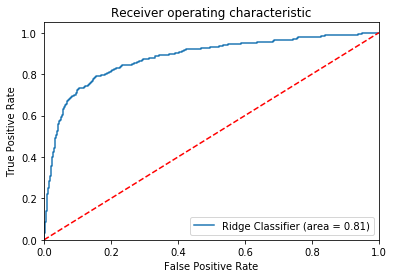

In [452]:
#Plot ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
ridge_clf_roc_auc = roc_auc_score(y_test_pca, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, ridge_clf._predict_proba_lr(pca_test_df)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Ridge Classifier (area = %0.2f)' % ridge_clf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RIDGE_ROC')
plt.show()

Area under the curve for the final model is 81%.

Model 2c - Ridge Classifier Summary:

- The accuracy of the model is good and the model blanced between non churners as well churners.
- The AUC of KNN model is just 81 %
- Recall is around 82 %
- Precision is around 23%

#### <font color = Blue> **Step 12: Model evaluation**</font>

Between the 3 performance modles we built.

- Random Forest
- K Nearest Neighbours
- Ridge Classifier

We can make use of **Ridge Classifier** to make churn predictions as this model has better performance over other two classifiers selected. However, with grid search approach we can further investigate into better hyper-parameters for Random forest to achieve even better performance model.

Thus, we made use of **Logistic Regression** model for identifying **significant predictors** that will help in **reducing high value customer churn** and we can make churn predictions using **Ridge Classifier** with **dimensionality reduction** technique.

#### <font color = Blue> **Step 13: Recommendations**</font>

**Following are some key recommendation basis EDA and modeling exercise**:

- High value prepaid customers associated with T operator for <font color =blue>less than 2 years</font> should be engaged to <font color =blue>make more outgoing calls in action phase</font>.
- High value prepaid customers at high risk of churning can be offered <font color =blue>competitive deals</font> for <font color =blue>t2t and t2f services</font> in action phase.
- High value prepaid customers at high risk of churning can be offered <font color =blue>competitive deals</font> for increased used of <font color =blue>fb services in action phase</font>.
- High value prepaid customers showing <font color =blue>consistent dip in there average revenue</font> should be enagaged for retention.
- High value prepaid customers with <font color =blue>more than 5 years of association with T operator</font> can be kept <font color =blue>lower on retention priority</font> and focus should be on lesser tenure customers for optimised workforce utilisation. 
